In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 
warnings.filterwarnings("ignore")

In [221]:
df = pd.read_csv('data/testing_data.csv')

In [222]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [223]:
df.grade = df.grade.astype('category')
df.grade = df.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df.condition = df.condition.astype('category')
df.condition = df.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
df.view = df.view.astype('category')
df.view = df.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

In [224]:
df.view = df.view.cat.codes
df.grade = df.grade.cat.codes
df.condition =df.condition.cat.codes

In [225]:
cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

In [226]:
data = {}

for i in cities.keys():
    if i in df.columns:
        data[i] = df[df[i] == 1]
    else:
        continue

In [227]:
data.keys()

dict_keys(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'])

In [228]:
df.columns
outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
           'has_basement', 'recently_renovated']

In [229]:
for i in data.keys():
    print("{}".format(i))
    print(data[i].loc[:, outliers].describe())
    print('       ')

Algona
               price    bedrooms   bathrooms  sqft_living       sqft_lot  \
count     361.000000  361.000000  361.000000   361.000000     361.000000   
mean   281194.869806    3.393352    2.011773  1903.783934   14967.002770   
std     98837.430520    0.726758    0.609274   653.794856   21213.757025   
min    100000.000000    1.000000    0.750000   770.000000    2064.000000   
25%    215000.000000    3.000000    1.500000  1440.000000    7245.000000   
50%    260000.000000    3.000000    2.000000  1824.000000    9292.000000   
75%    320000.000000    4.000000    2.500000  2240.000000   14439.000000   
max    850000.000000    6.000000    3.500000  5440.000000  239580.000000   

           floors  waterfront        view   condition       grade  \
count  361.000000       361.0  361.000000  361.000000  361.000000   
mean     1.430748         0.0    0.094183    2.321330    4.296399   
std      0.490942         0.0    0.507712    0.620765    0.874461   
min      1.000000         0.0   

              price    bedrooms   bathrooms   sqft_living      sqft_lot  \
count  3.170000e+02  317.000000  317.000000    317.000000    317.000000   
mean   1.356524e+06    3.854890    2.527603   2909.022082  13104.220820   
std    7.460941e+05    0.976504    0.950634   1308.368630   6441.120122   
min    4.250000e+05    2.000000    1.000000    860.000000    779.000000   
25%    8.450000e+05    3.000000    1.750000   1910.000000   8879.000000   
50%    1.150000e+06    4.000000    2.500000   2660.000000  11119.000000   
75%    1.690000e+06    4.000000    3.250000   3850.000000  16200.000000   
max    7.060000e+06   10.000000    6.000000  10040.000000  44384.000000   

           floors  waterfront        view   condition       grade  \
count  317.000000  317.000000  317.000000  317.000000  317.000000   
mean     1.432177    0.003155    0.305994    2.495268    5.687697   
std      0.516475    0.056166    0.840657    0.619419    1.460538   
min      1.000000    0.000000    0.000000    0.0

max              1.000000  
       
Kent
               price     bedrooms    bathrooms  sqft_living       sqft_lot  \
count    1201.000000  1201.000000  1201.000000  1201.000000    1201.000000   
mean   299470.047460     3.444629     2.097002  1940.424646   14984.905079   
std     91647.452823     0.707441     0.601265   673.280368   31082.492933   
min     85000.000000     1.000000     0.750000   650.000000    1561.000000   
25%    245000.000000     3.000000     1.750000  1460.000000    6295.000000   
50%    283000.000000     3.000000     2.250000  1860.000000    8034.000000   
75%    339950.000000     4.000000     2.500000  2313.000000   10890.000000   
max    859000.000000     6.000000     5.000000  5820.000000  443440.000000   

            floors  waterfront         view    condition        grade  \
count  1201.000000      1201.0  1201.000000  1201.000000  1201.000000   
mean      1.457535         0.0     0.029975     2.472107     4.382182   
std       0.493571         0.0     0.

max              1.000000  
       
Redmond
              price     bedrooms    bathrooms   sqft_living       sqft_lot  \
count  1.418000e+03  1418.000000  1418.000000   1418.000000    1418.000000   
mean   6.669047e+05     3.508463     2.433886   2524.346262   19135.239069   
std    2.435622e+05     0.812047     0.628785    941.942480   35523.478523   
min    1.700000e+05     1.000000     0.750000    530.000000     785.000000   
25%    5.100000e+05     3.000000     2.000000   1832.500000    6522.000000   
50%    6.339500e+05     3.500000     2.500000   2420.000000    9198.500000   
75%    7.757125e+05     4.000000     2.500000   3100.000000   13648.750000   
max    3.080000e+06     7.000000     8.000000  13540.000000  453895.000000   

            floors   waterfront         view    condition        grade  \
count  1418.000000  1418.000000  1418.000000  1418.000000  1418.000000   
mean      1.644217     0.006347     0.101551     2.182652     5.377997   
std       0.497529     0.079443

              price     bedrooms    bathrooms   sqft_living       sqft_lot  \
count  8.973000e+03  8973.000000  8973.000000   8973.000000    8973.000000   
mean   5.350856e+05     3.170846     1.894433   1795.343698    6455.839630   
std    3.405186e+05     1.036940     0.787431    798.026129    5425.185747   
min    7.800000e+04     1.000000     0.500000    370.000000     520.000000   
25%    3.370000e+05     3.000000     1.000000   1240.000000    3904.000000   
50%    4.530000e+05     3.000000     1.750000   1640.000000    5589.000000   
75%    6.300000e+05     4.000000     2.500000   2190.000000    7815.000000   
max    7.700000e+06    33.000000     8.000000  12050.000000  137214.000000   

            floors   waterfront         view    condition        grade  \
count  8973.000000  8973.000000  8973.000000  8973.000000  8973.000000   
mean      1.460715     0.007355     0.301460     2.430514     4.339128   
std       0.587800     0.085452     0.856354     0.724694     1.012683   
m

In [230]:
df.lat, df.long

(0        47.5112
 1        47.7210
 2        47.7379
 3        47.5208
 4        47.6168
           ...   
 21394    47.6993
 21395    47.5107
 21396    47.5944
 21397    47.5345
 21398    47.5941
 Name: lat, Length: 21399, dtype: float64,
 0       -122.257
 1       -122.319
 2       -122.233
 3       -122.393
 4       -122.045
           ...   
 21394   -122.346
 21395   -122.362
 21396   -122.299
 21397   -122.069
 21398   -122.299
 Name: long, Length: 21399, dtype: float64)

In [231]:
from math import cos, sin, atan2, sqrt, pi

def center_geolocation(geolocations):
    """
    Provide a relatively accurate center lat, lon returned as a list pair, given
    a list of list pairs.
    ex: in: geolocations = ((lat1,lon1), (lat2,lon2),)
        out: (center_lat, center_lon)
    """
    x = 0
    y = 0
    z = 0

    for lat, lon in geolocations:
        lat = float(lat *(pi/180))
        lon = float(lon * (pi/180))
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(geolocations))
    y = float(y / len(geolocations))
    z = float(z / len(geolocations))
    
    degrees1 = atan2(z, sqrt(x * x + y * y))
    degrees2 = atan2(y, x)

    return (degrees1 * (180/pi), degrees2 *(180/pi))

In [232]:
coordinates = {}

for i in data.keys():
    x = data[i]['lat']
    y = data[i]['long']
    pair = list(zip(x,y))
    
    coordinates[i] = pair
    
    

    

In [233]:
center_location = {}

for i in data.keys():
    center_location[i] = center_geolocation(coordinates[i])

In [234]:
for i in center_location.keys():
    print('{} : {}'.format(i, center_location[i]))

Algona : (47.309106343981384, -122.27070044933522)
Auburn : (47.30854005572448, -122.27676582103699)
Federal Way : (47.31053224165728, -122.32132927351802)
Beaux Arts Village : (47.616183826606125, -122.20518721213313)
Bellevue : (47.59390218225879, -122.15570714644898)
Clyde Hill : (47.616183826606125, -122.20518721213313)
Hunts Point : (47.616183826606125, -122.20518721213313)
Yarrow Point : (47.616183826606125, -122.20518721213313)
Black Diamond : (47.333218058574275, -121.99947283065686)
Bothell : (47.75516310891854, -122.22772946271448)
Carnation : (47.671627810177164, -121.84858639209433)
Duvall : (47.73710920443352, -121.95483585247659)
Enumclaw : (47.21123075623289, -121.99554880772615)
Fall City : (47.55876680494092, -121.90547261010268)
Issaquah : (47.554457705248, -122.02523399866831)
Kent : (47.375893695872826, -122.16518645535287)
Kirkland : (47.70273832807398, -122.19865397295318)
Maple Valley : (47.37064204472687, -122.03175526548821)
Medina : (47.6258401004965, -122.233

In [235]:
center_location.pop('Clyde Hill')
center_location.pop('Hunts Point')
center_location.pop('Yarrow Point')


(47.616183826606125, -122.20518721213313)

In [236]:
for i in data.keys():
    print('{} : {}'.format(i, len(data[i])))

Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Redmond : 1418
Renton : 1597
Newcastle : 874
Snoqualmie : 308
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446


In [237]:
regions_df = {}

regions_df['Southwest'] = df[(df['Federal Way'] == 1) | (df['Auburn'] == 1) | (df['Algona'] == 1)]
regions_df['Southeast'] = df[(df['Enumclaw'] == 1) | (df['Black Diamond'] == 1) | (df['Maple Valley'] == 1) | 
                             (df['Covington'] == 1) | (df['Kent'] == 1)]
regions_df['Island'] = df[df['Vashon'] == 1]

regions_df['South_of_Seattle'] = df[(df['Des Moines'] == 1) | (df['Normandy Park'] == 1) | (df['Seatac'] == 1) | 
                             (df['Burien'] == 1) | (df['Tukwila'] == 1)]
regions_df['Seattle'] = df[df['Seattle'] == 1]
regions_df['Southeast_of_Seattle'] = df[(df['Renton'] == 1) | (df['Newcastle'] == 1)]
regions_df['Rich'] = df[(df['Mercer Island'] == 1) | (df['Bellevue'] == 1) | (df['Beaux Arts Village'] == 1) | 
                             (df['Medina'] == 1)]
regions_df['Kirkland'] = df[df['Kirkland'] == 1]
regions_df['Northeast'] = df[(df['Kenmore'] == 1) | (df['Bothell'] == 1) | (df['Woodinville'] == 1)]
regions_df['North'] = df[(df['Shoreline'] == 1) | (df['Lake Forest Park'] == 1)]
regions_df['Redmond'] = df[df['Redmond'] == 1]
regions_df['Suburan'] = df[(df['Sammamish'] == 1) | (df['Issaquah'] == 1)]
regions_df['Rural'] = df[(df['Duvall'] == 1) | (df['Carnation'] == 1) | (df['Fall City'] == 1) | 
                             (df['Snoqualmie'] == 1) | (df['North Bend'] == 1)]


<Figure size 640x480 with 0 Axes>

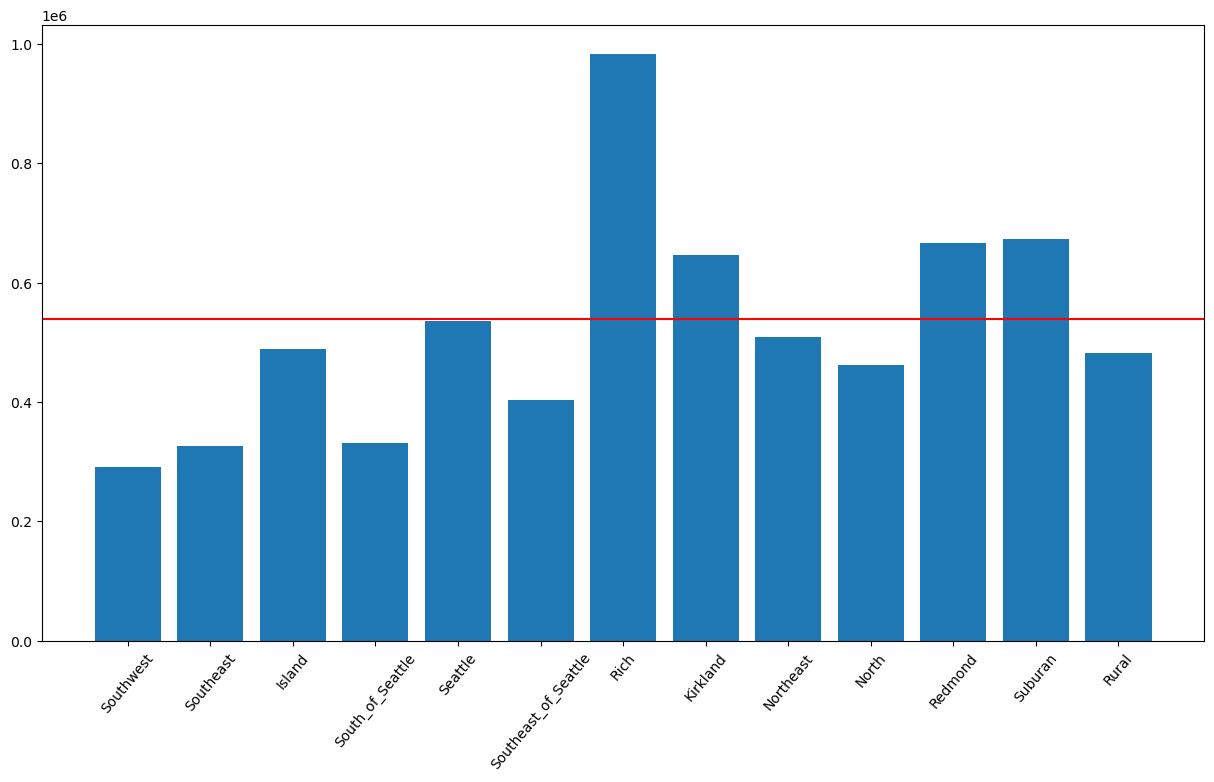

In [238]:
mean_prices = []

for i in regions_df.keys():
    mean_prices.append(regions_df[i]['price'].mean())
    
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(list(range(len(mean_prices))), mean_prices)
ax.set_xticks(list(range(len(mean_prices))))
ax.set_xticklabels(regions_df.keys(), rotation=50)
ax.axhline(y = df.price.mean(), color = 'r', linestyle = '-')

plt.show()

This is : Southwest


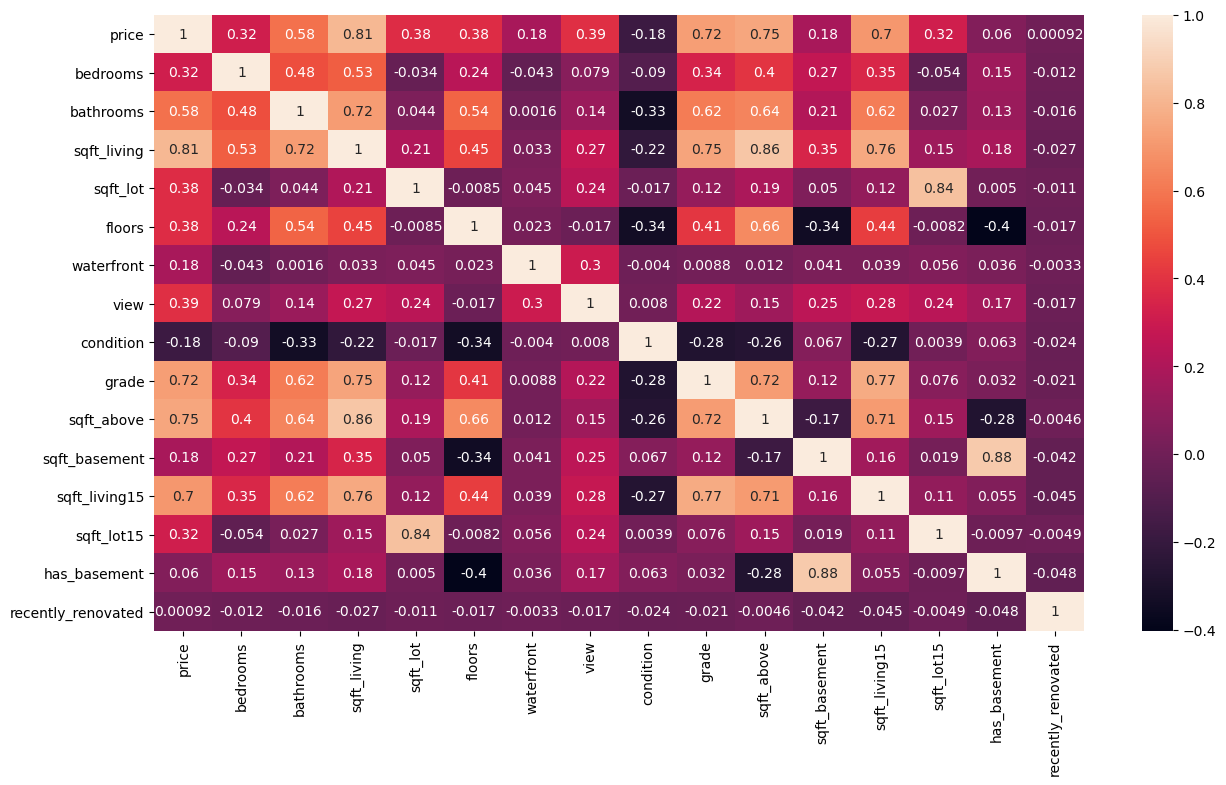

This is : Southeast


<Figure size 640x480 with 0 Axes>

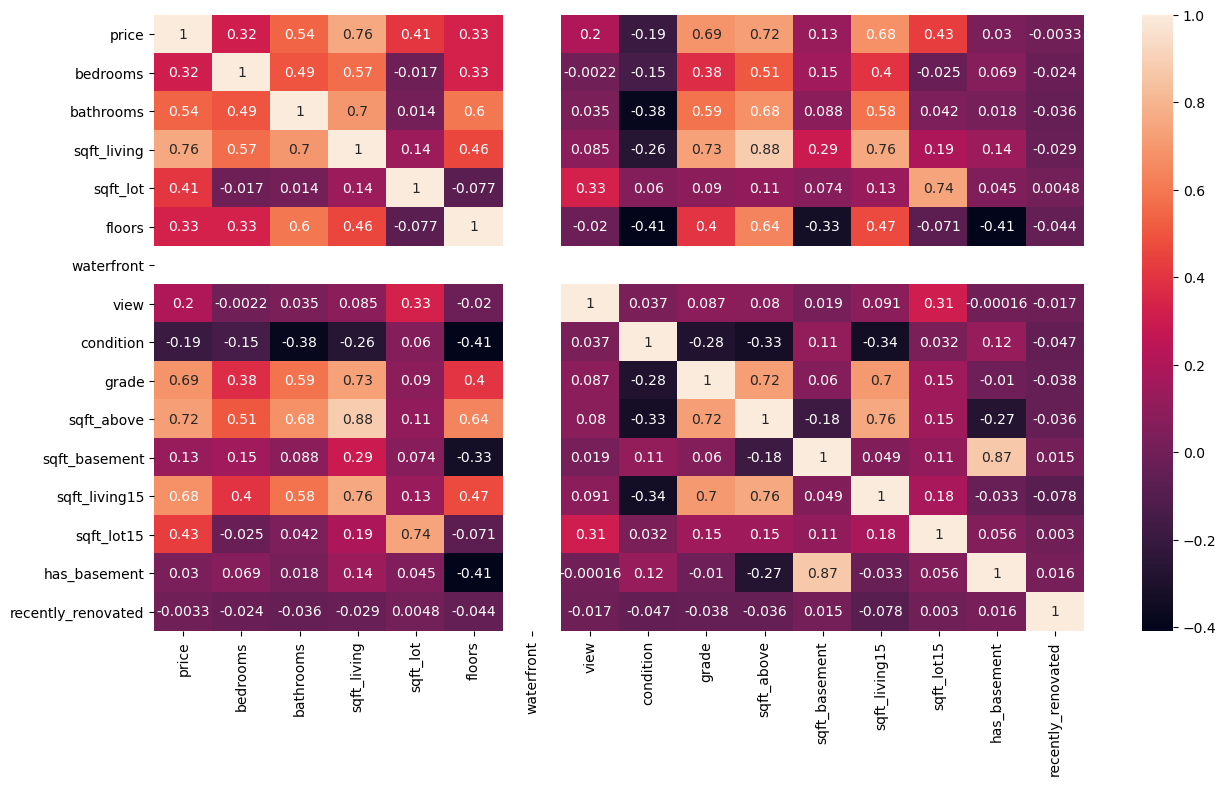

This is : Island


<Figure size 640x480 with 0 Axes>

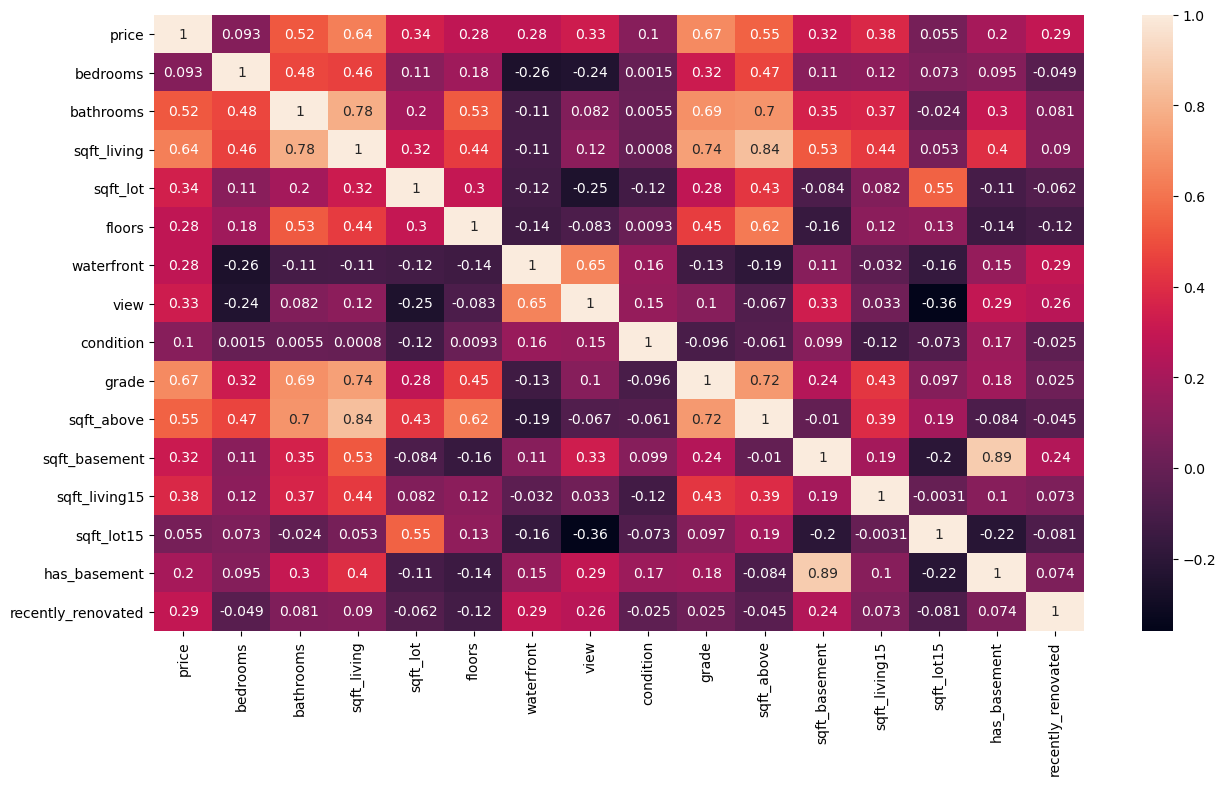

This is : South_of_Seattle


<Figure size 640x480 with 0 Axes>

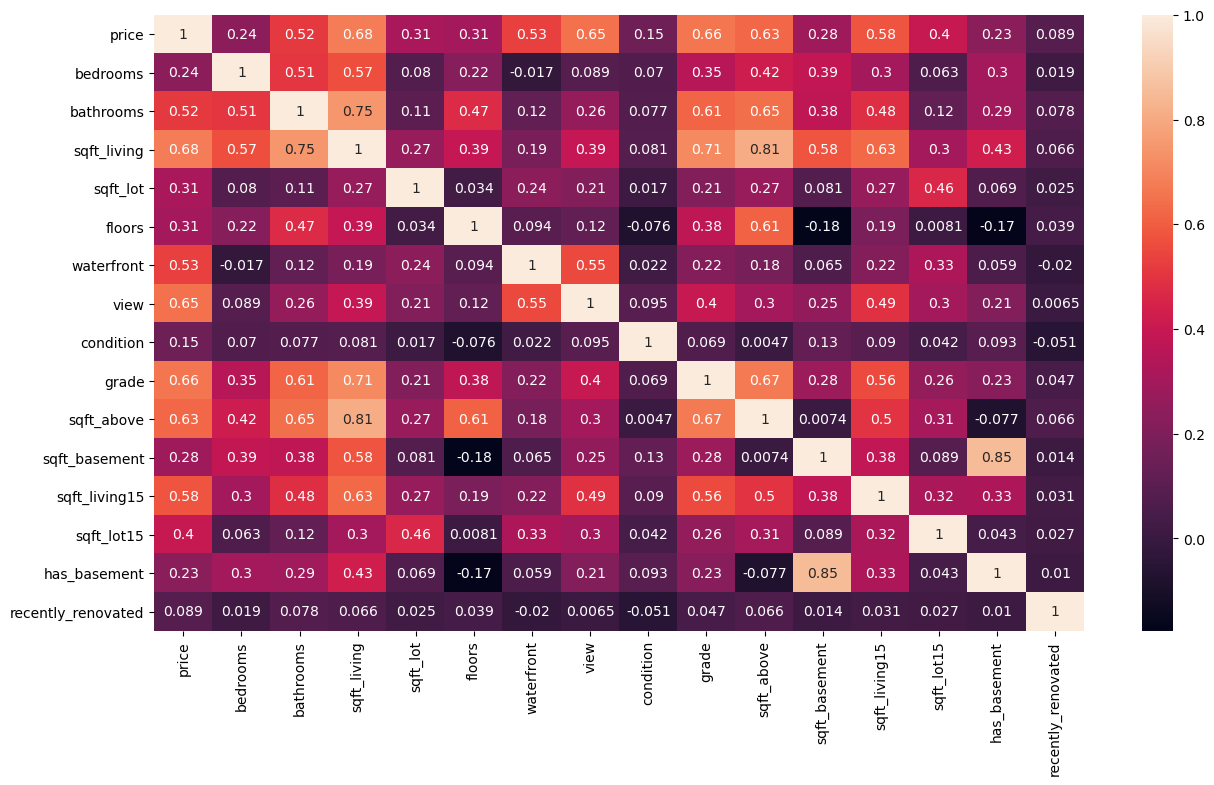

This is : Seattle


<Figure size 640x480 with 0 Axes>

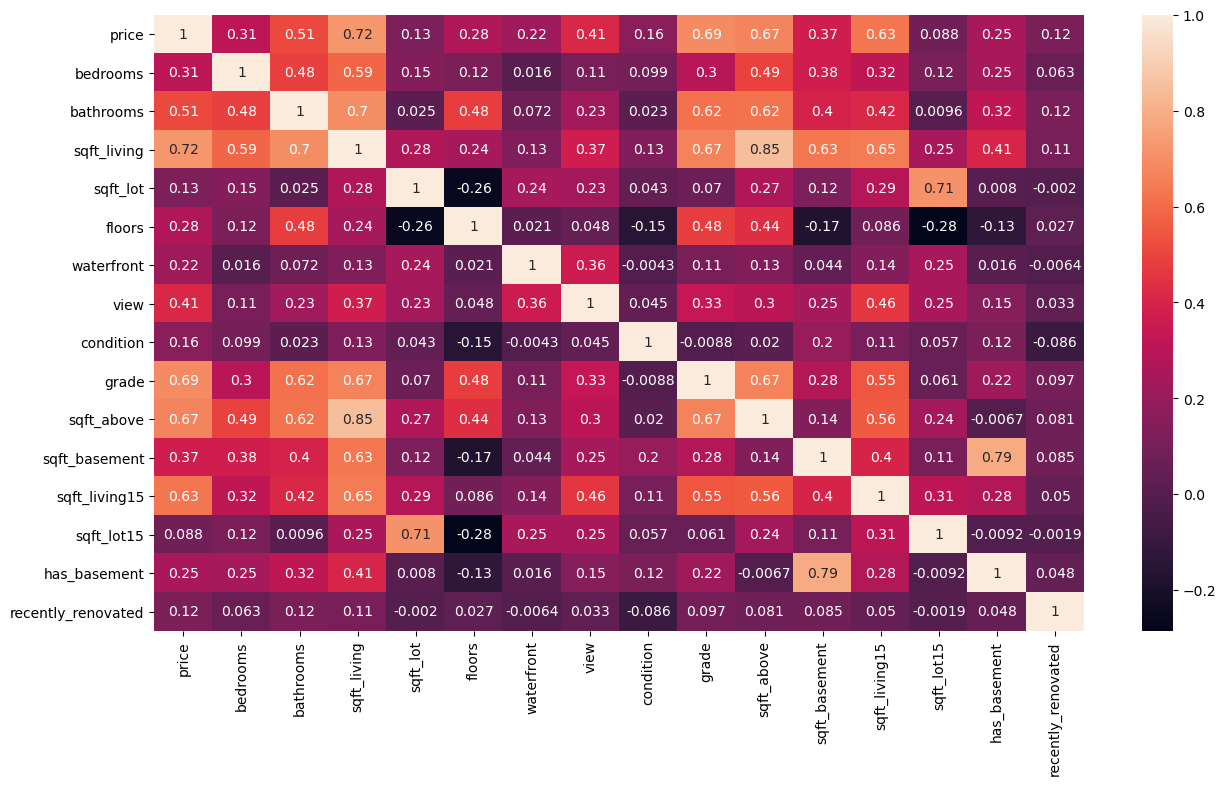

This is : Southeast_of_Seattle


<Figure size 640x480 with 0 Axes>

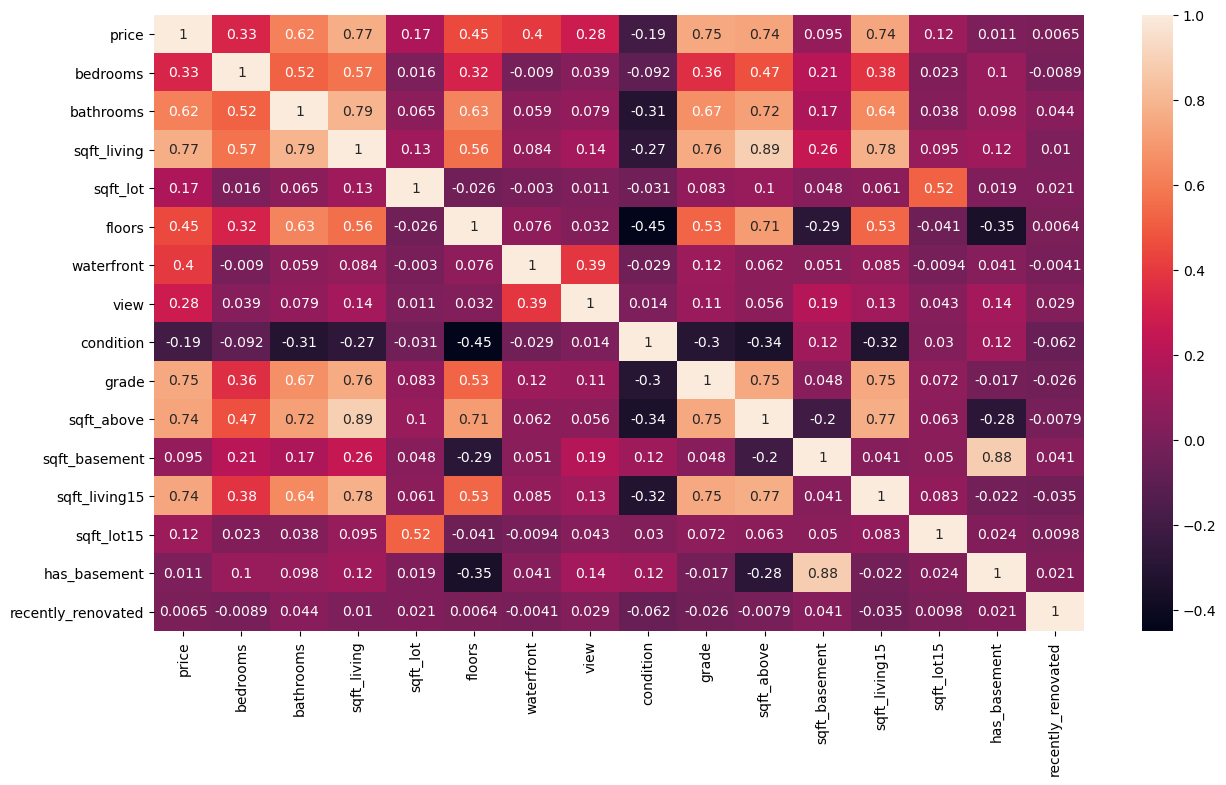

This is : Rich


<Figure size 640x480 with 0 Axes>

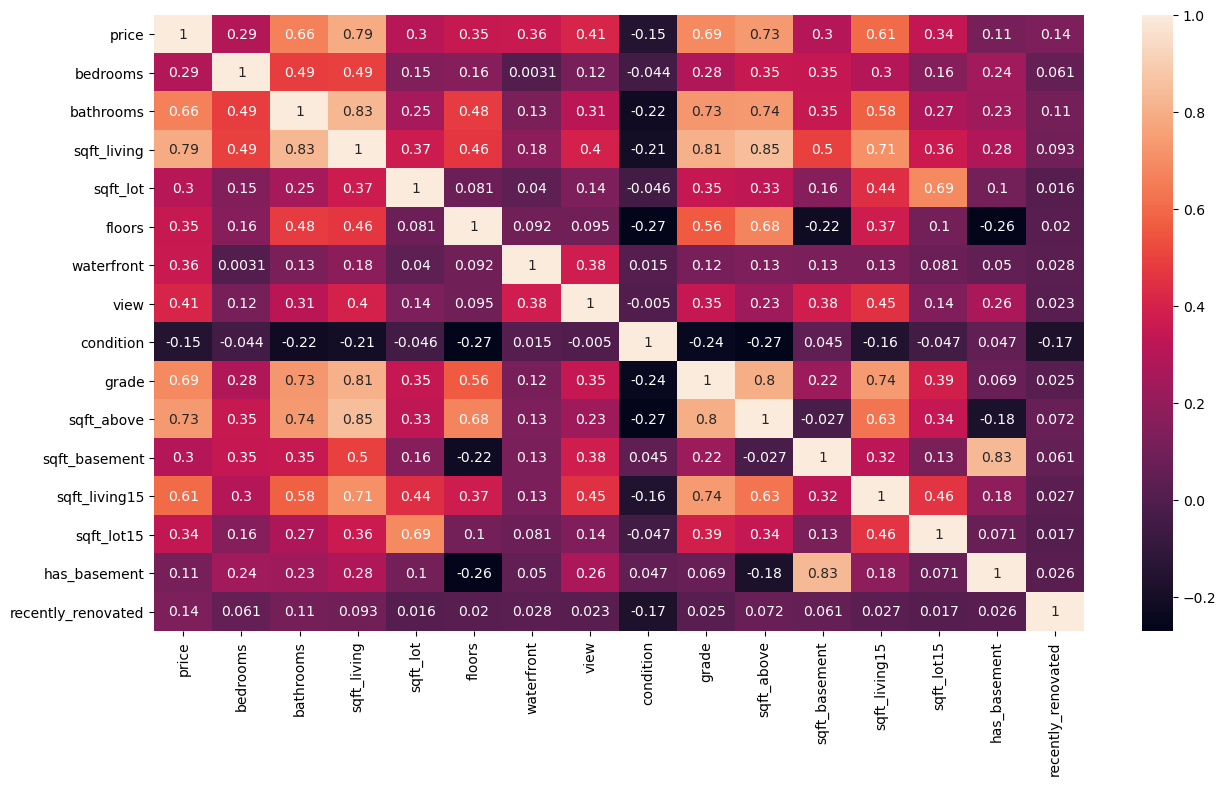

This is : Kirkland


<Figure size 640x480 with 0 Axes>

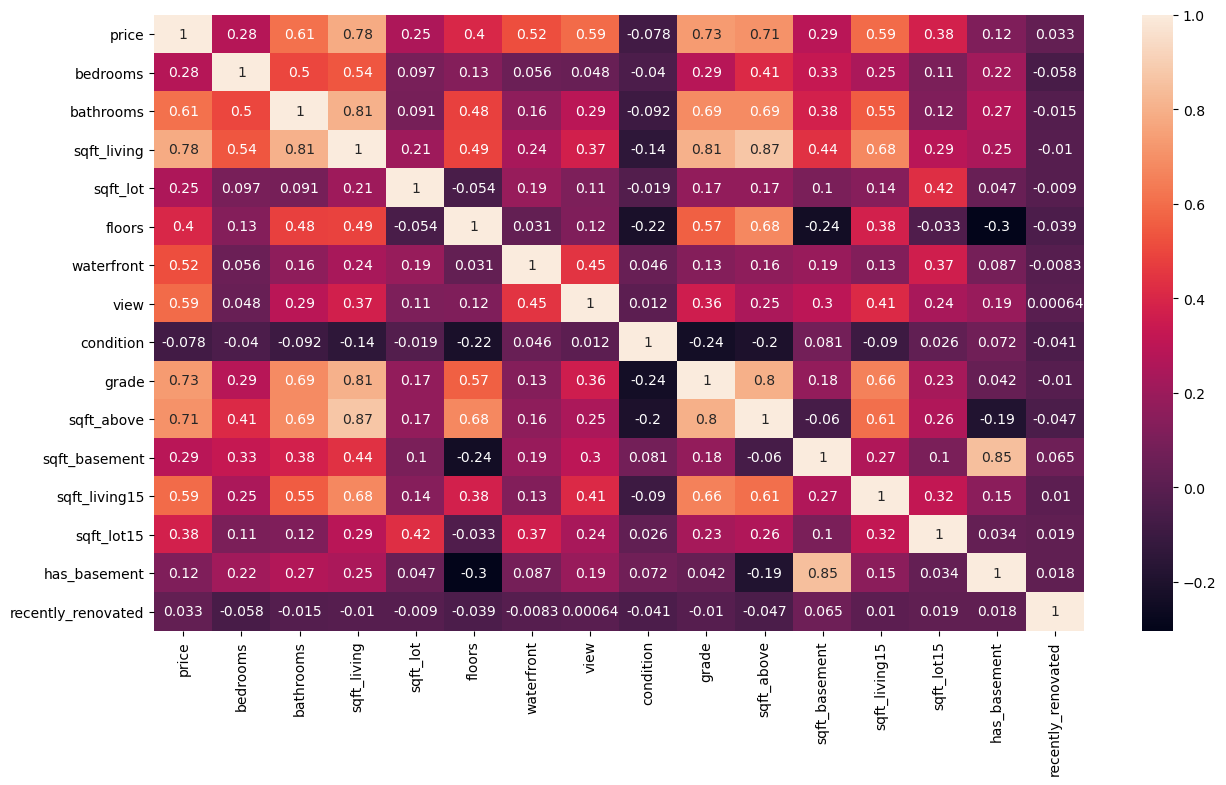

This is : Northeast


<Figure size 640x480 with 0 Axes>

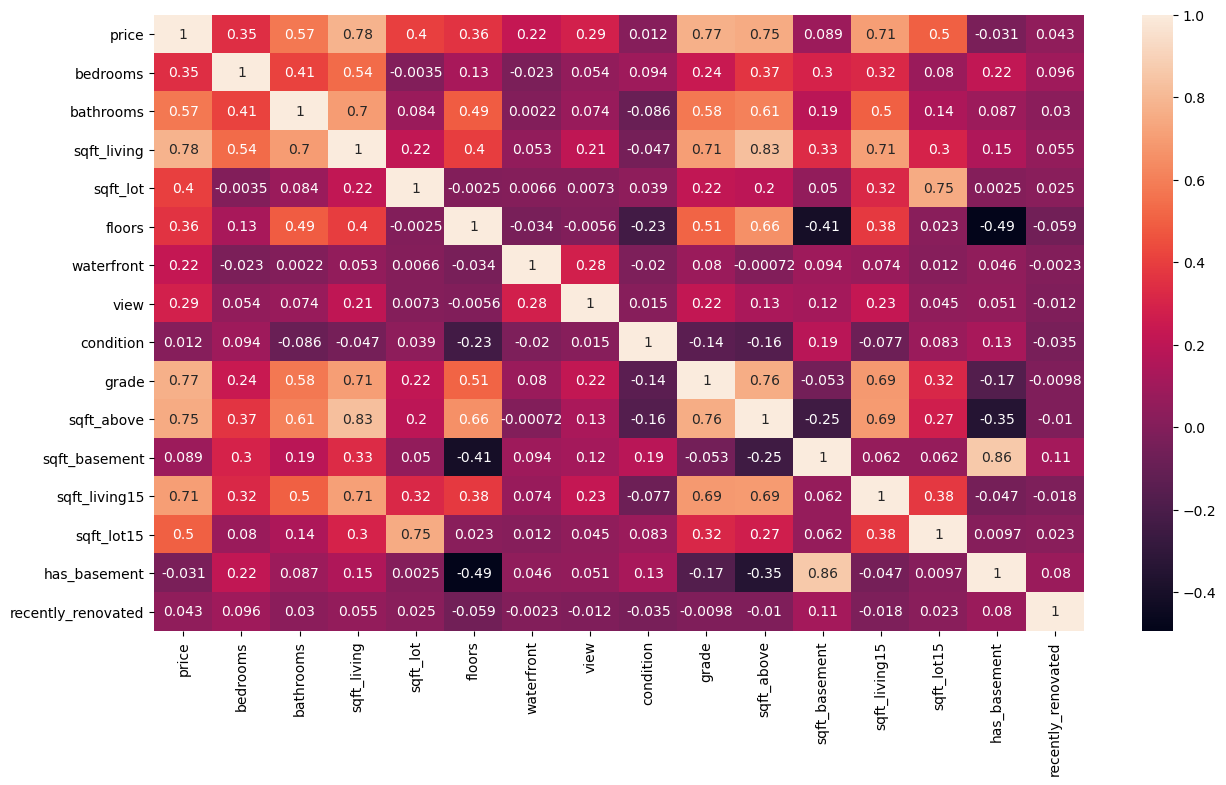

This is : North


<Figure size 640x480 with 0 Axes>

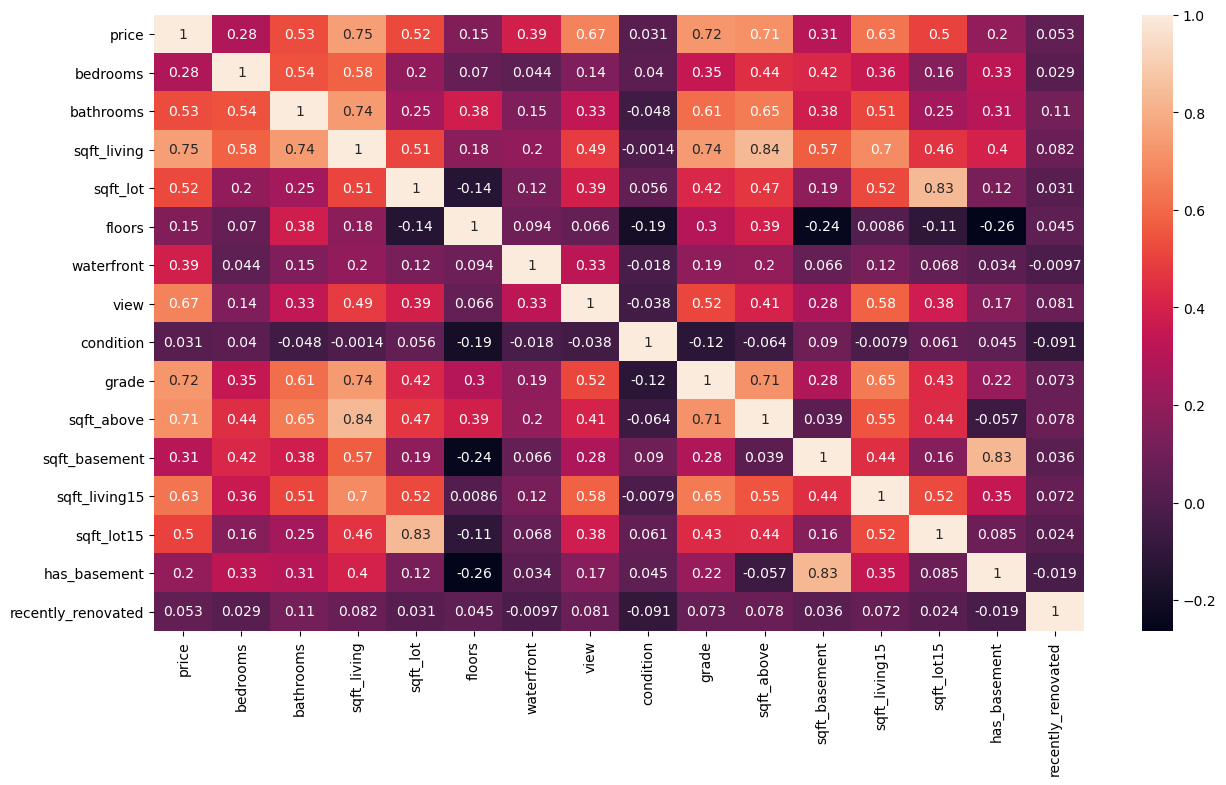

This is : Redmond


<Figure size 640x480 with 0 Axes>

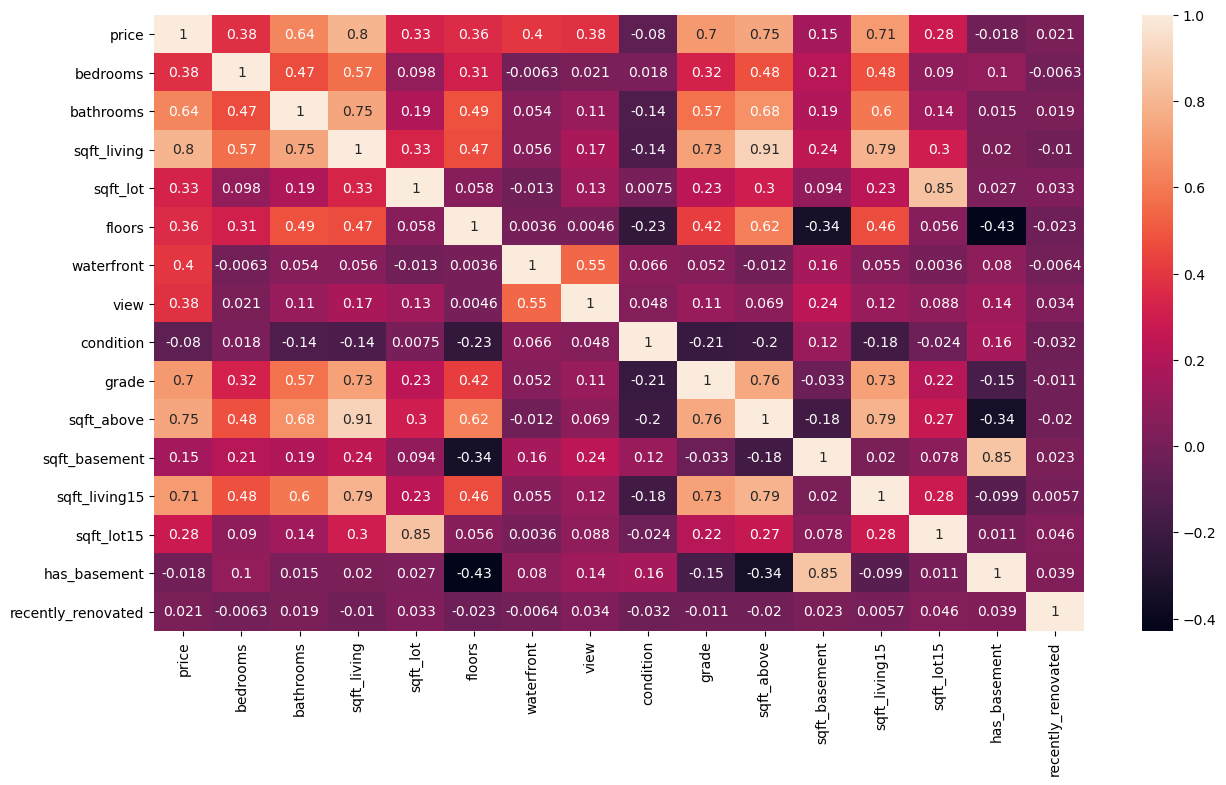

This is : Suburan


<Figure size 640x480 with 0 Axes>

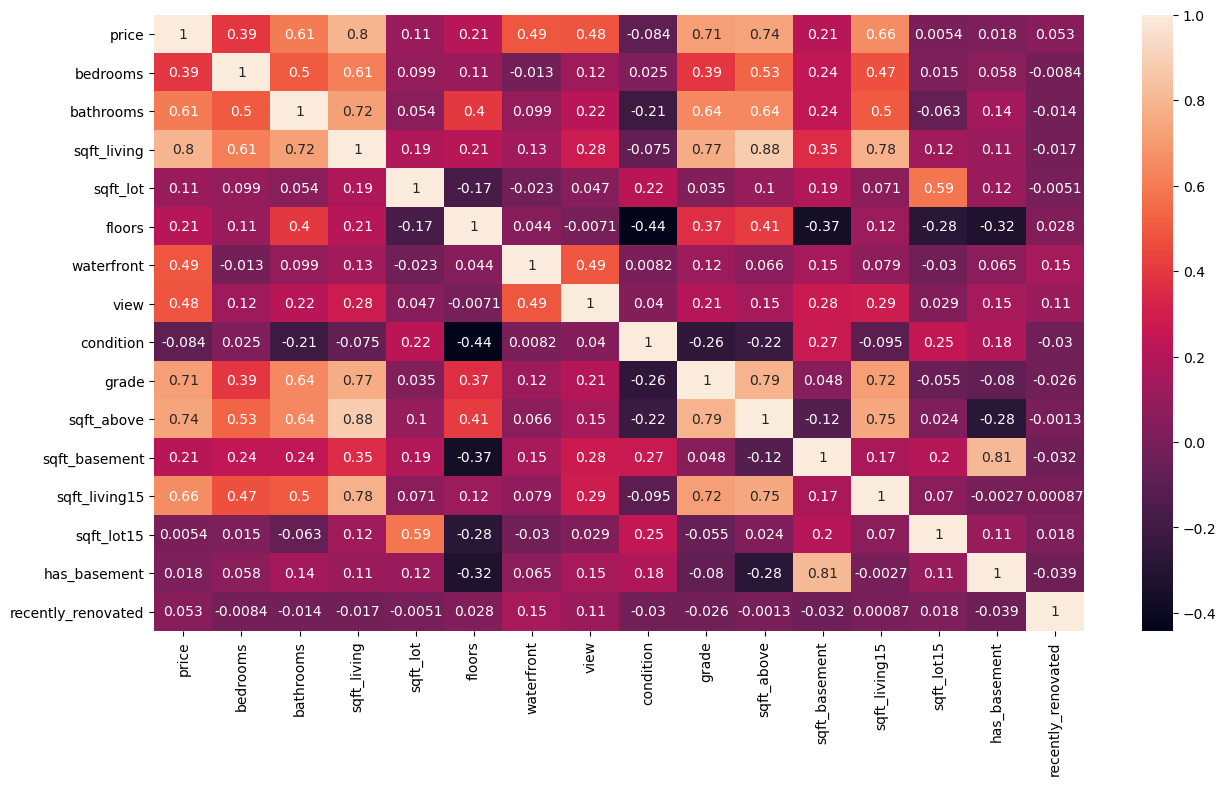

This is : Rural


<Figure size 640x480 with 0 Axes>

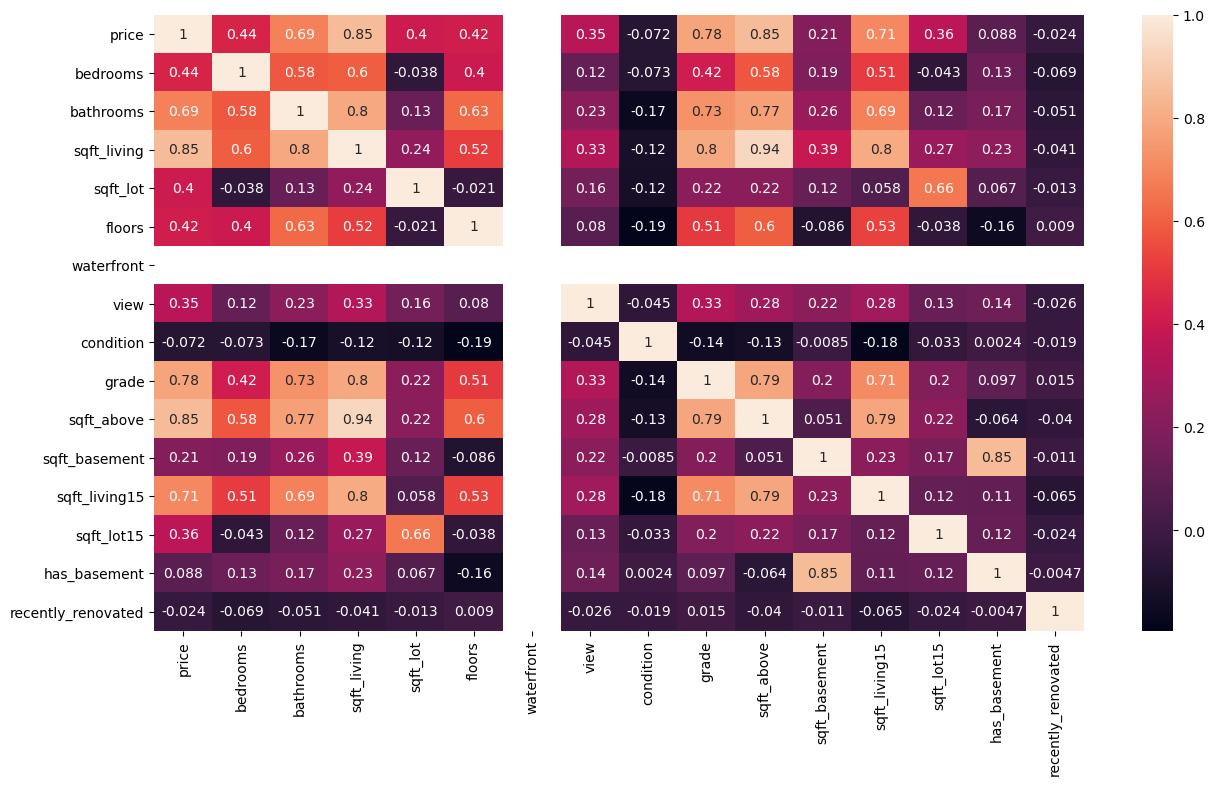

In [20]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()

This is : Southwest


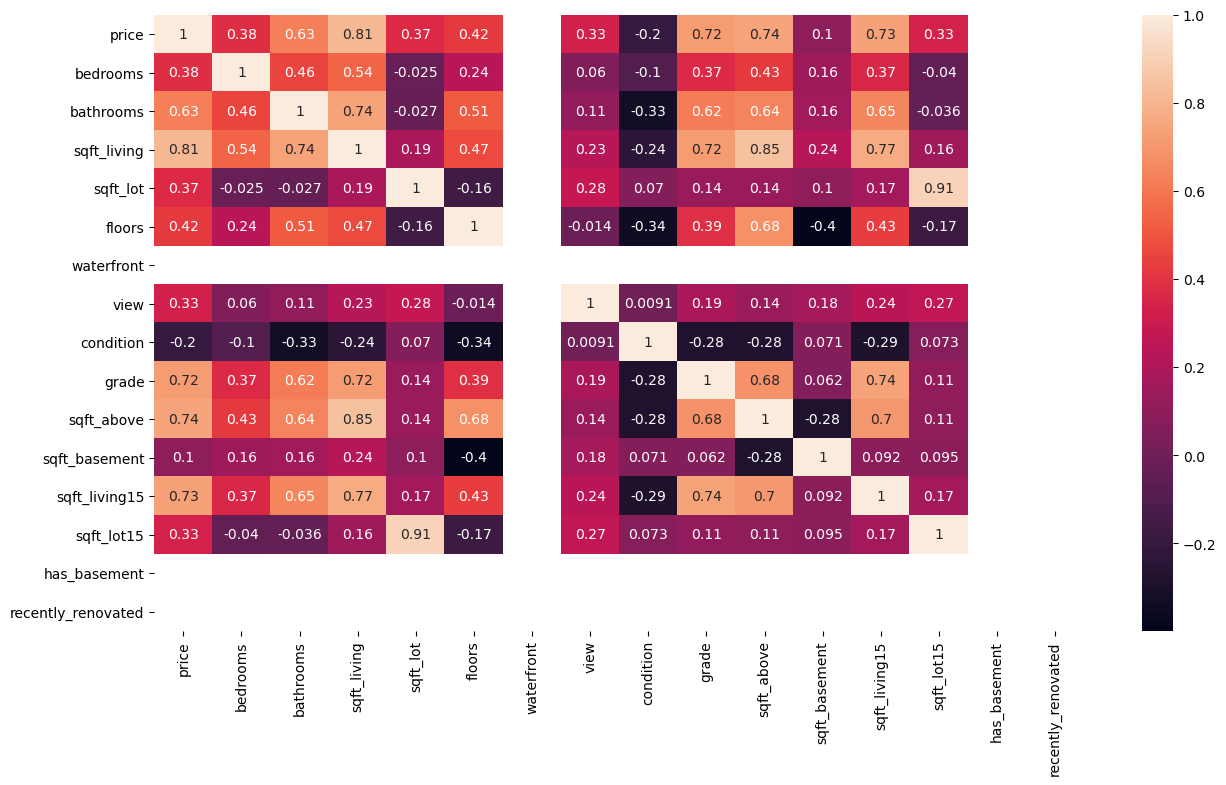

This is : Southeast


<Figure size 640x480 with 0 Axes>

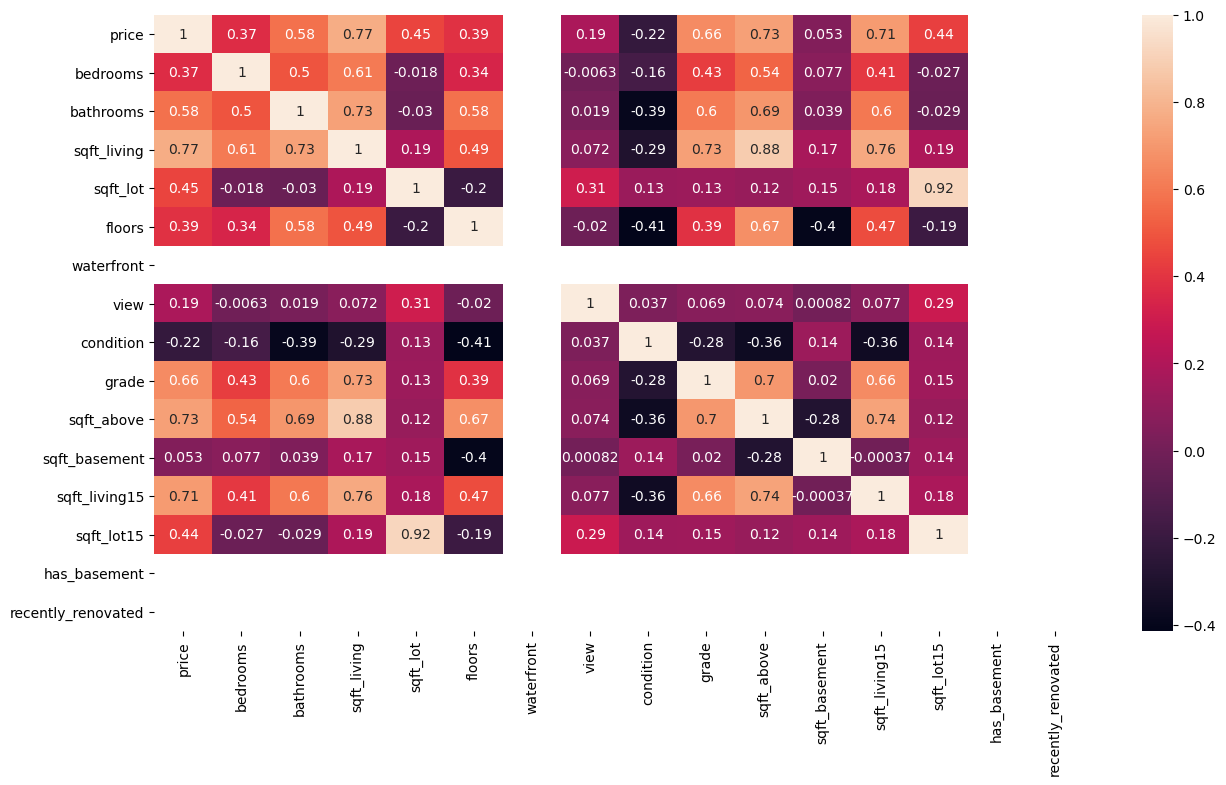

This is : Island


<Figure size 640x480 with 0 Axes>

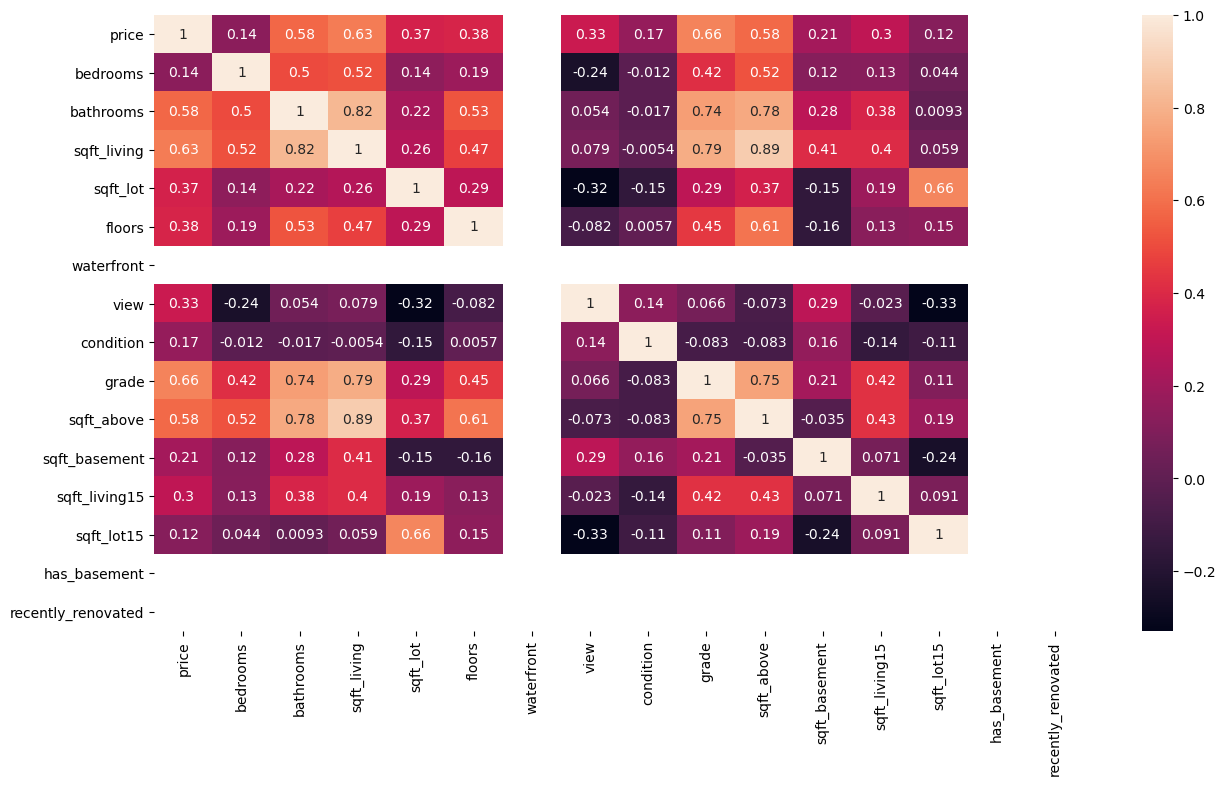

This is : South_of_Seattle


<Figure size 640x480 with 0 Axes>

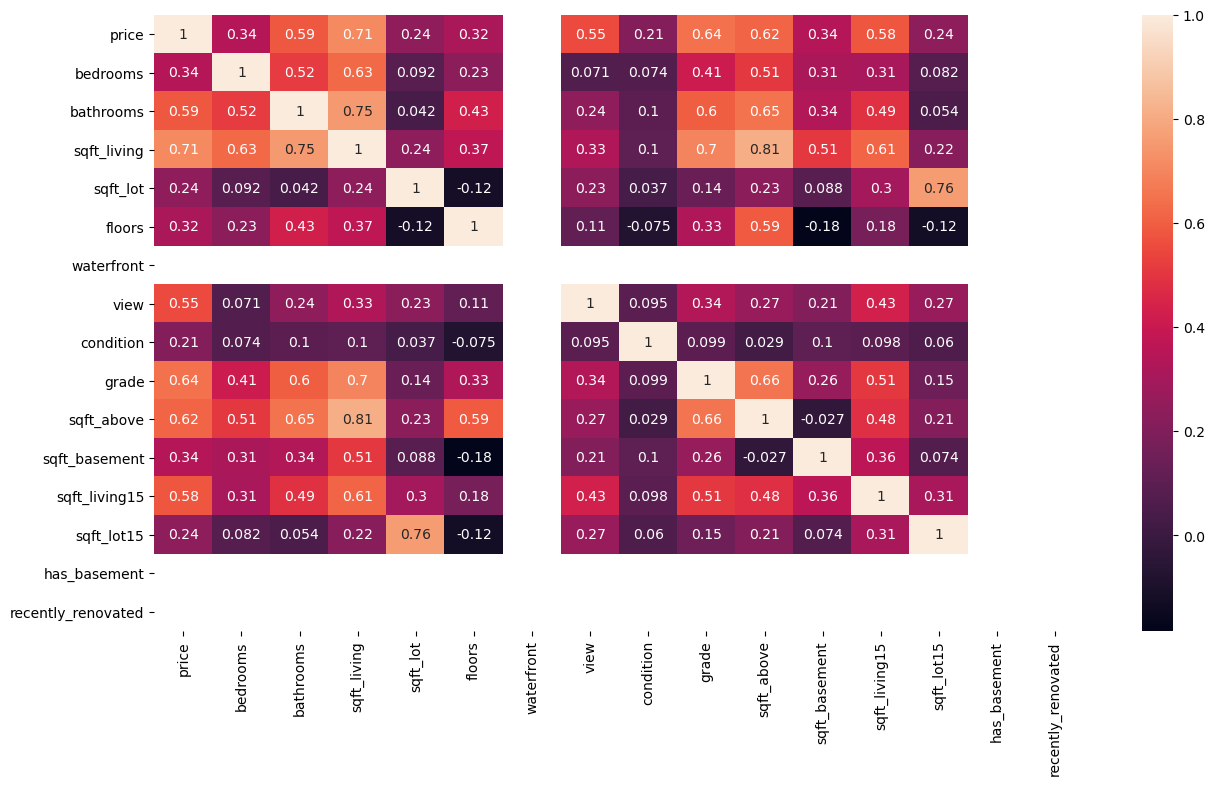

This is : Seattle


<Figure size 640x480 with 0 Axes>

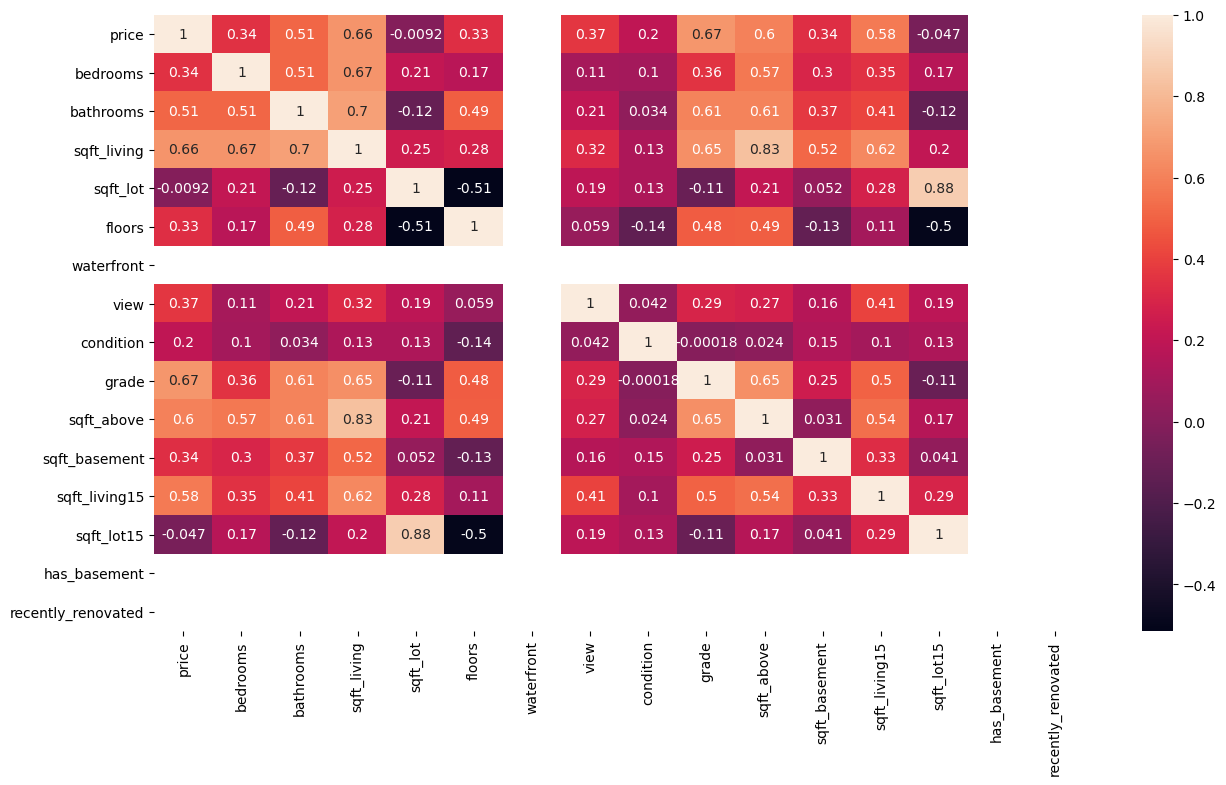

This is : Southeast_of_Seattle


<Figure size 640x480 with 0 Axes>

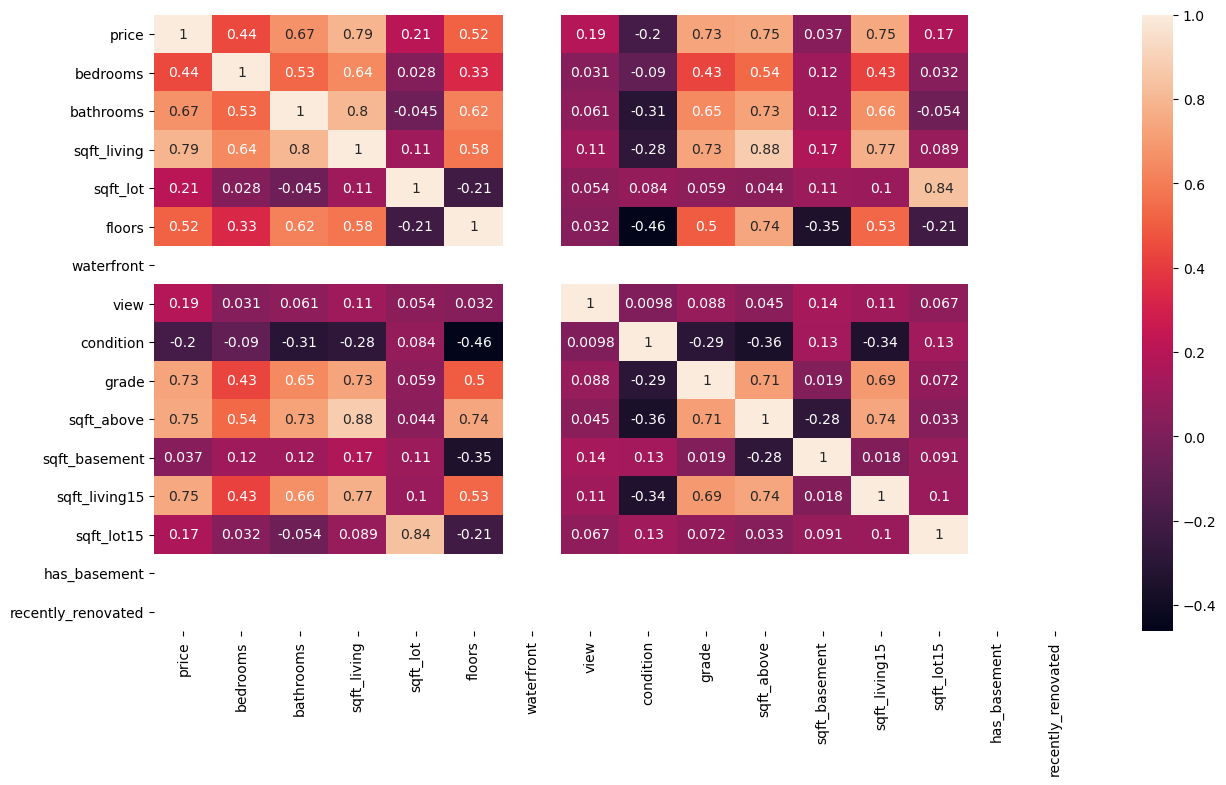

This is : Rich


<Figure size 640x480 with 0 Axes>

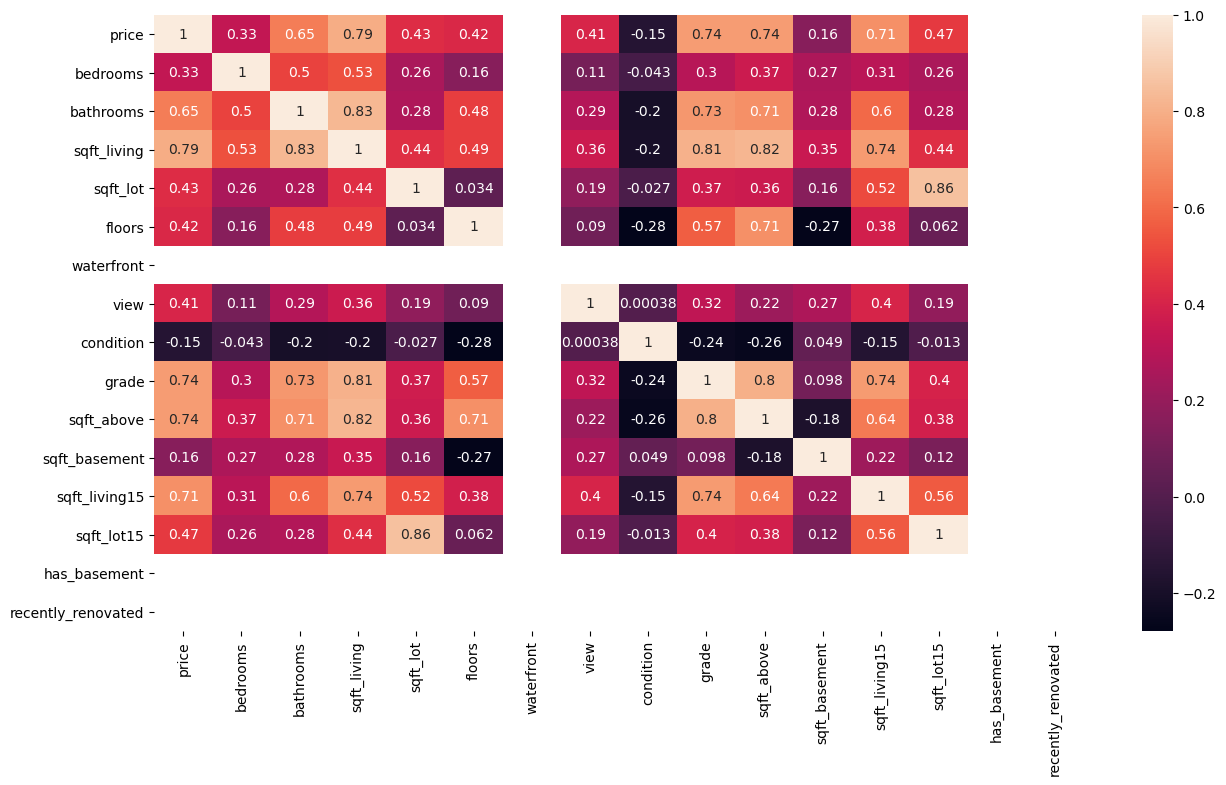

This is : Kirkland


<Figure size 640x480 with 0 Axes>

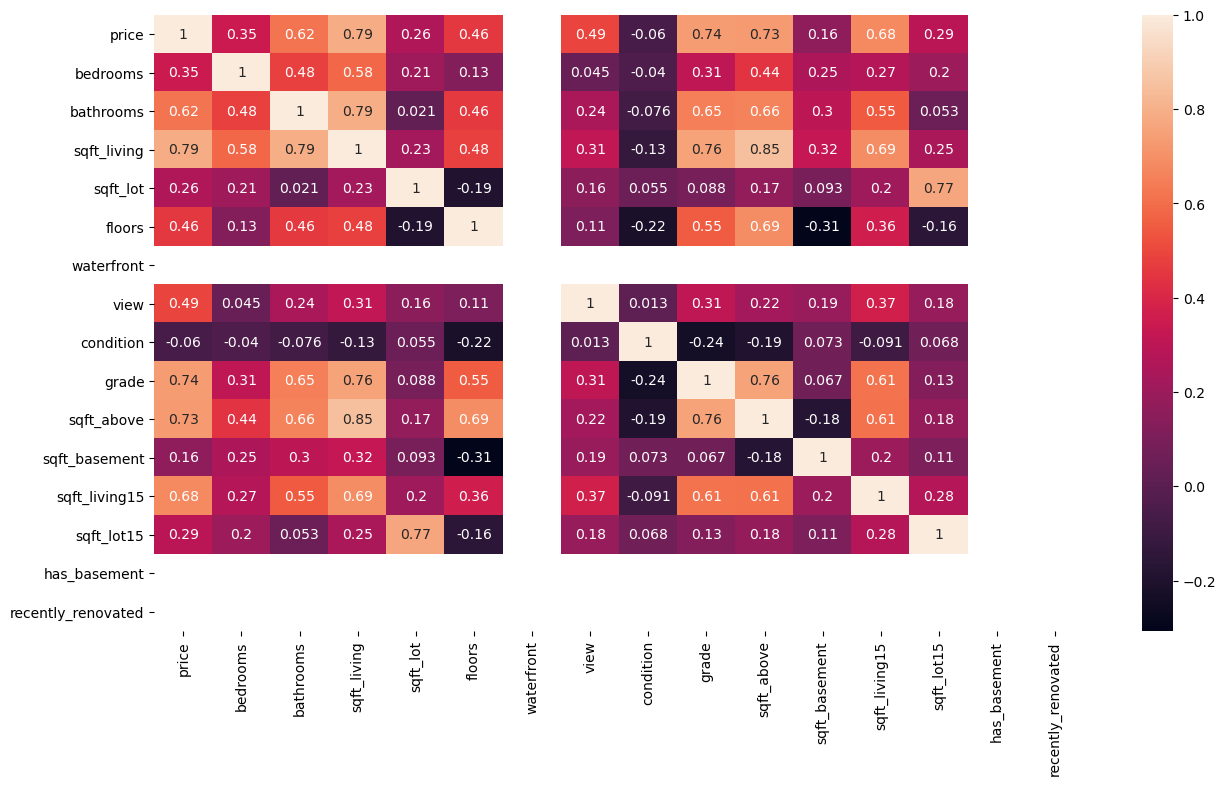

This is : Northeast


<Figure size 640x480 with 0 Axes>

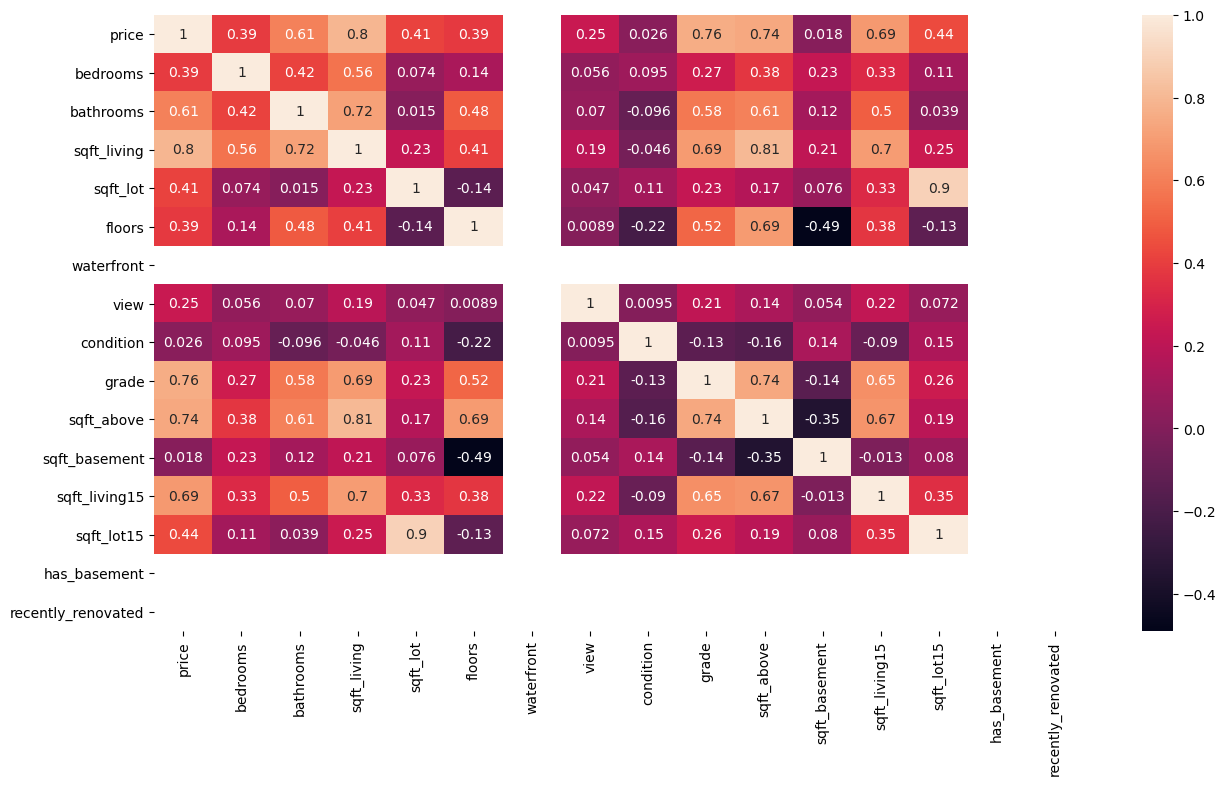

This is : North


<Figure size 640x480 with 0 Axes>

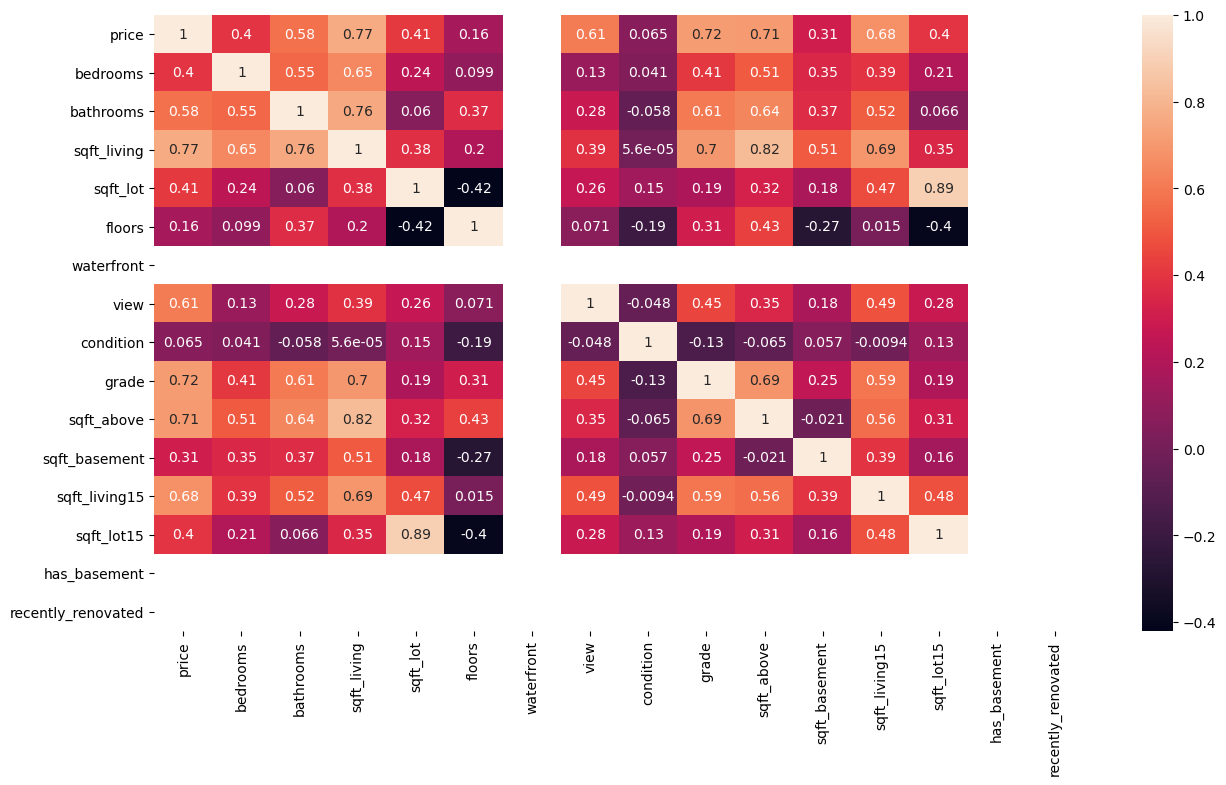

This is : Redmond


<Figure size 640x480 with 0 Axes>

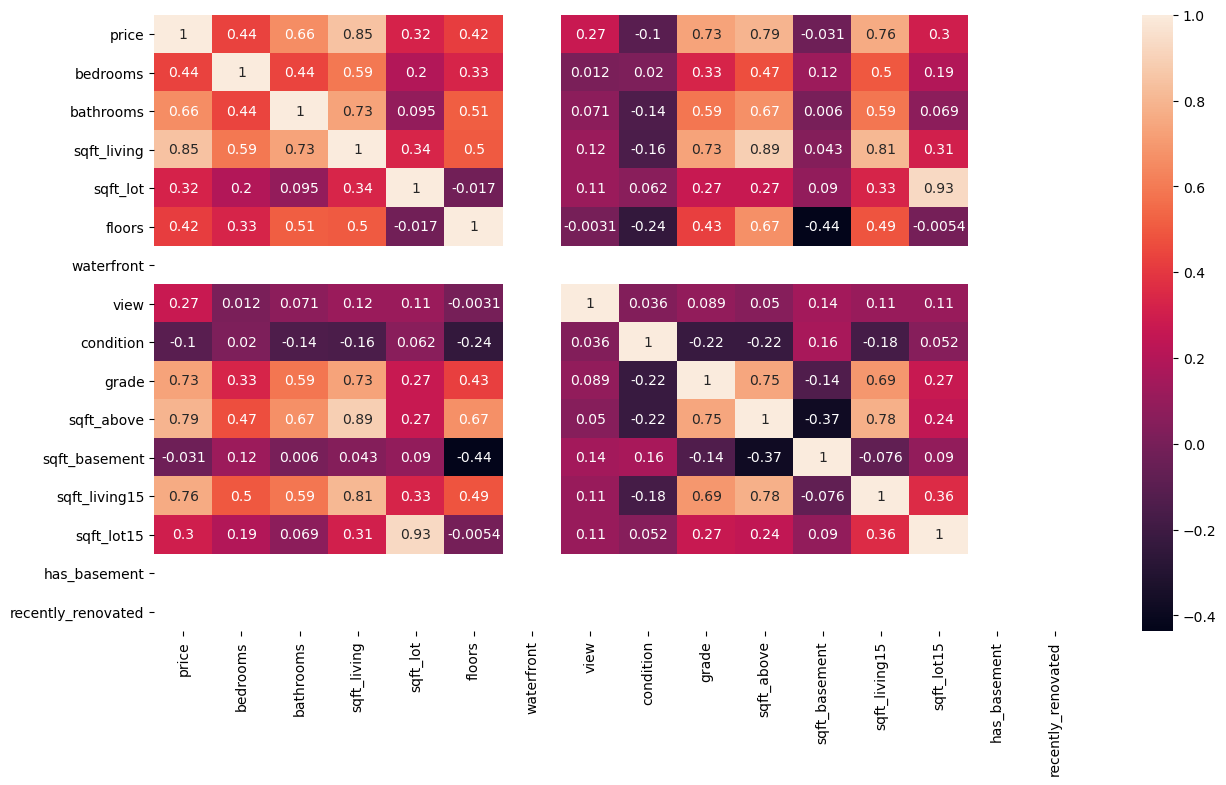

This is : Suburan


<Figure size 640x480 with 0 Axes>

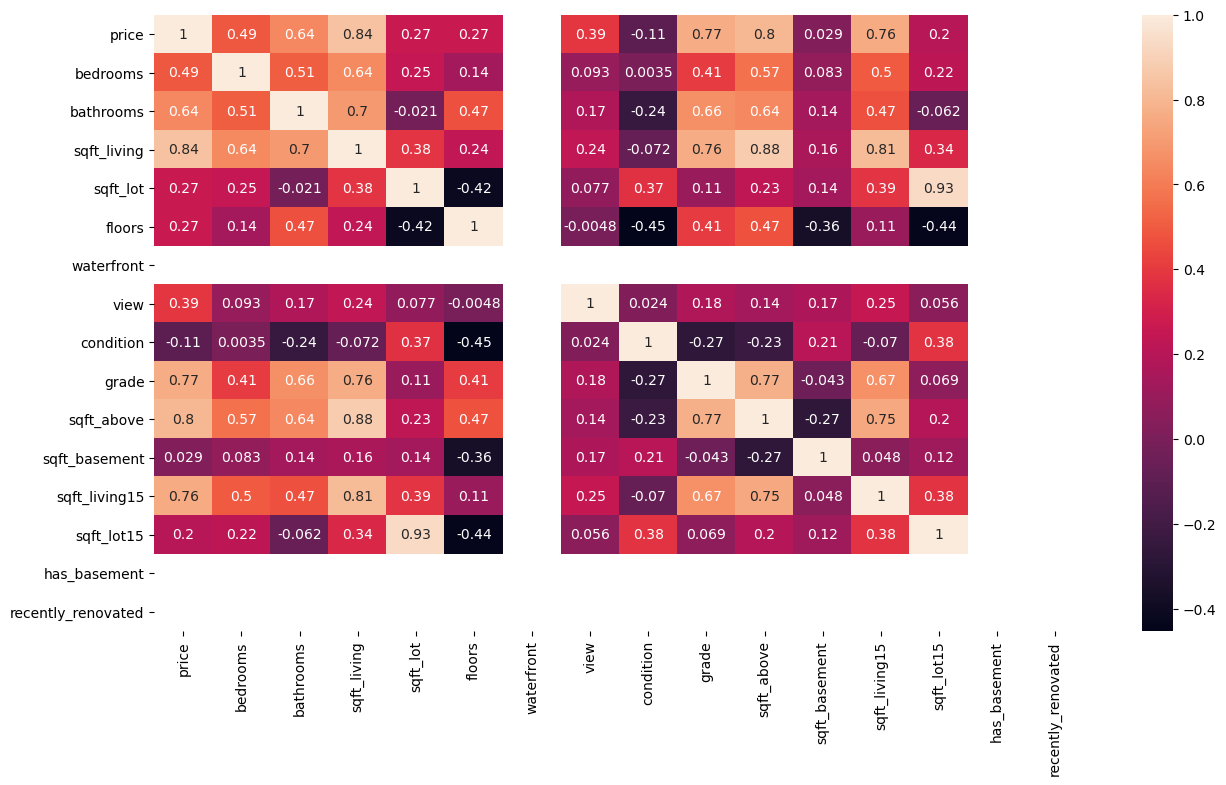

This is : Rural


<Figure size 640x480 with 0 Axes>

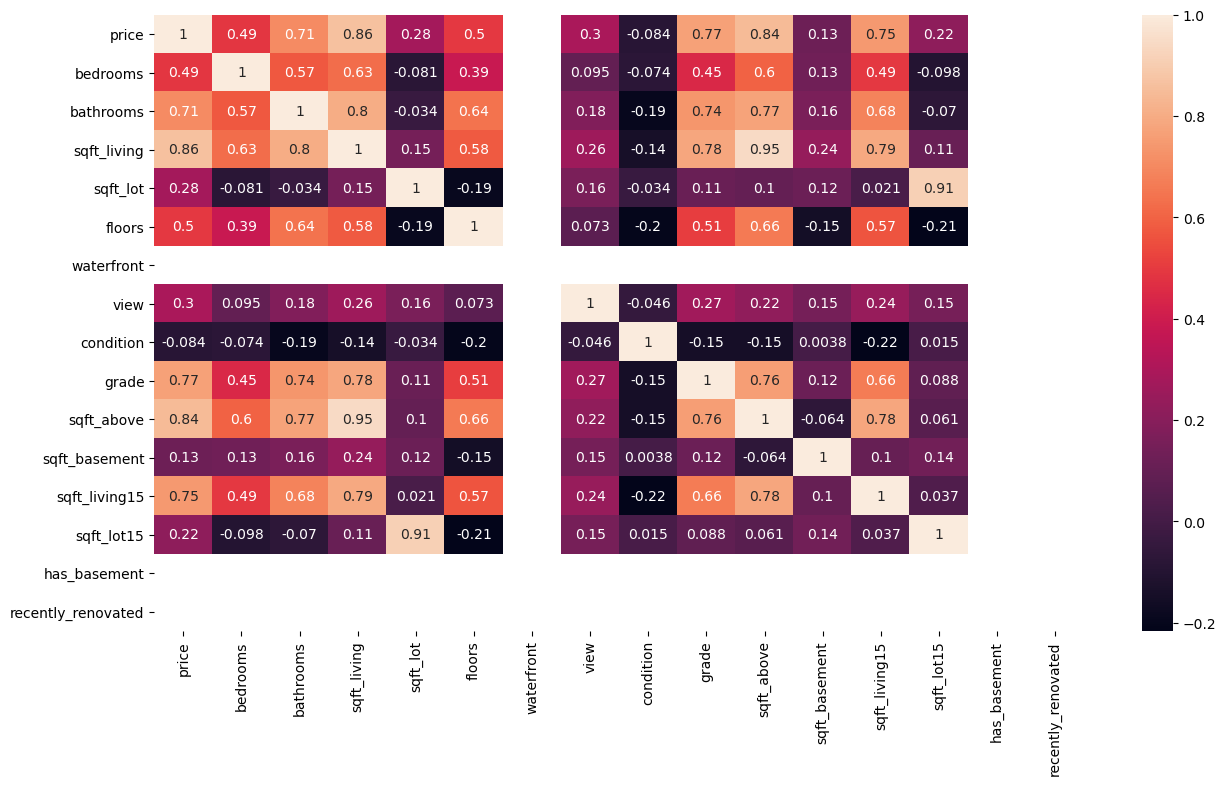

In [129]:
for i in regions_df.keys():
    corr = regions_df[i].loc[:, outliers].corr()
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    sns.heatmap(corr, annot=True)
    plt.show()
    plt.clf()

This is : Southwest


<Figure size 640x480 with 0 Axes>

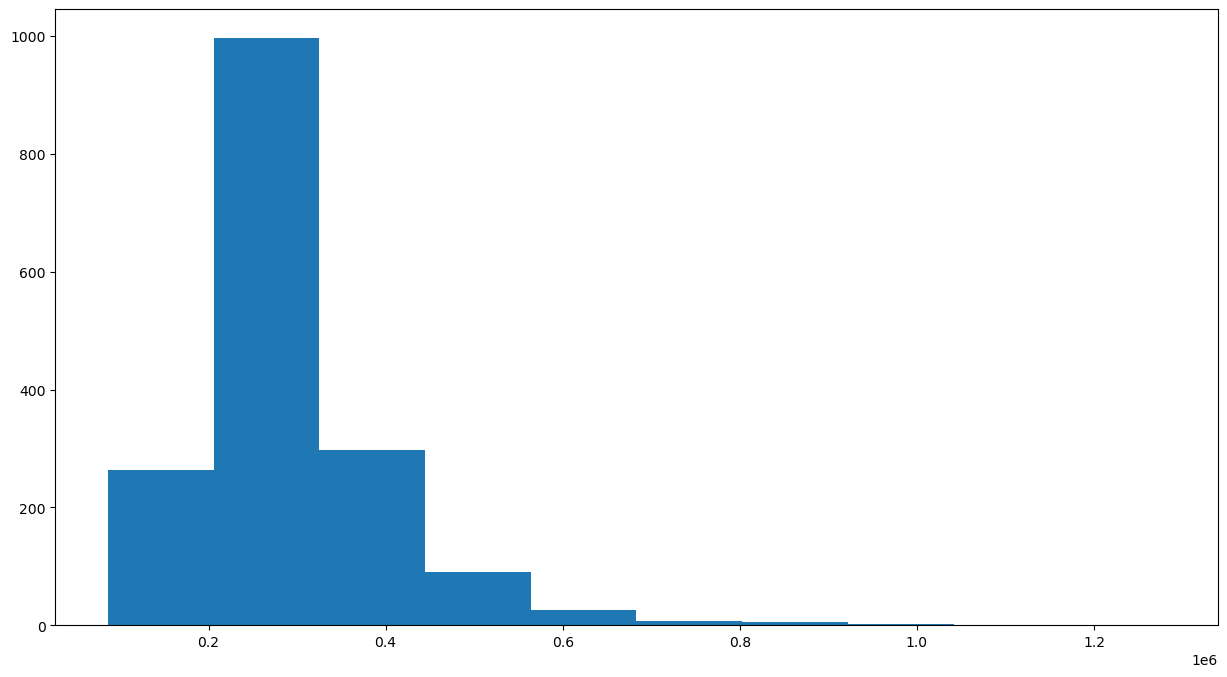

This is : Southeast


<Figure size 640x480 with 0 Axes>

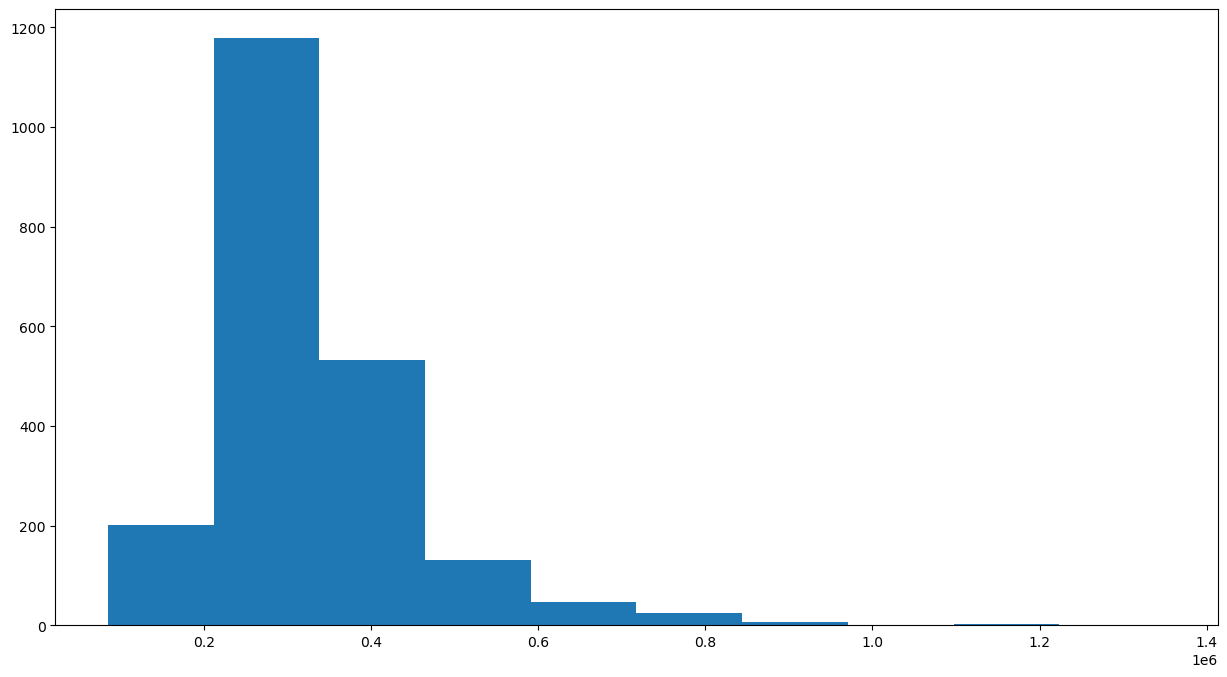

This is : Island


<Figure size 640x480 with 0 Axes>

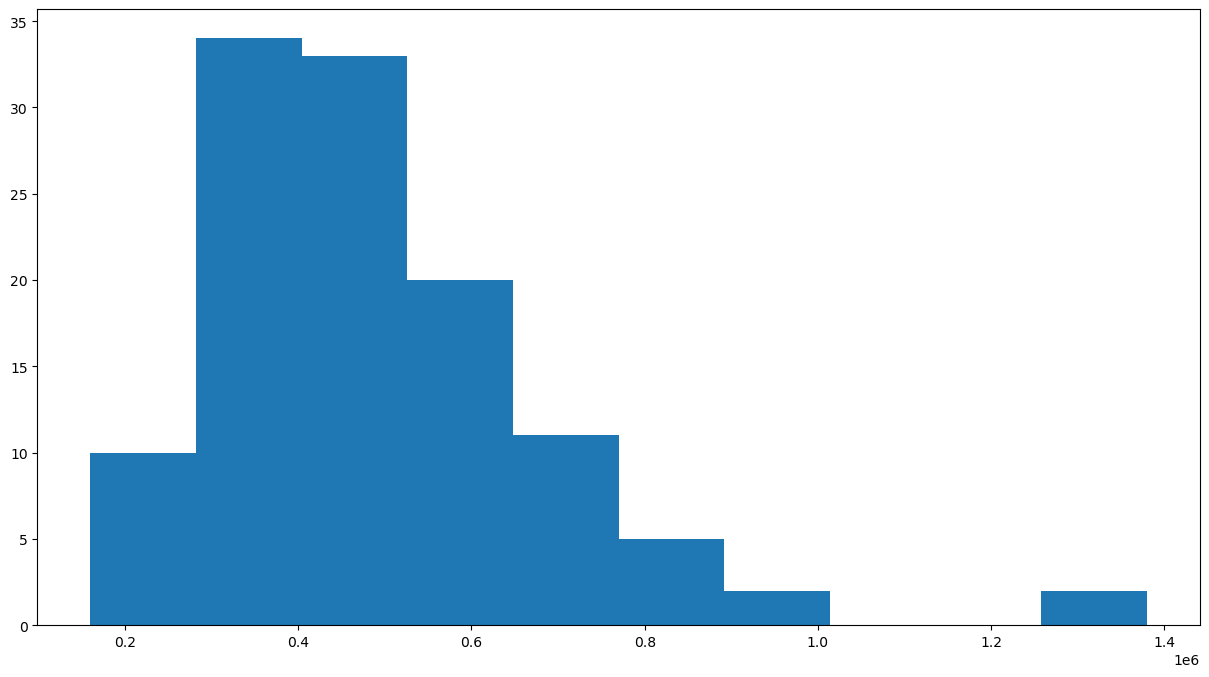

This is : South_of_Seattle


<Figure size 640x480 with 0 Axes>

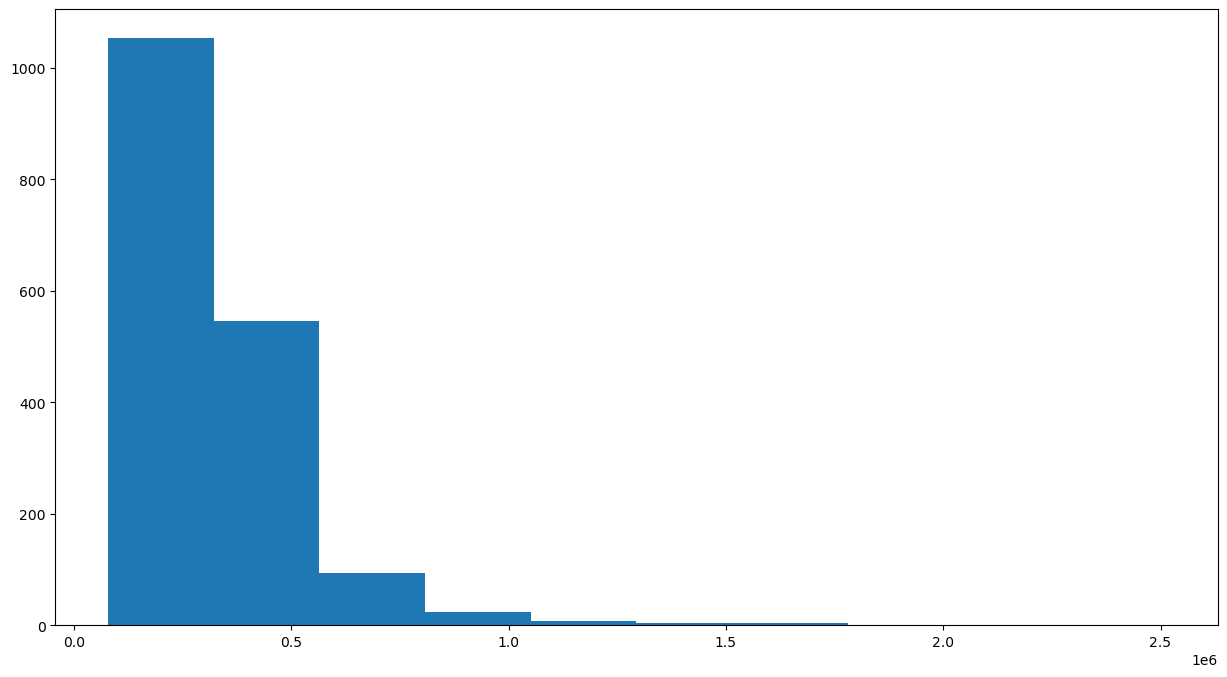

This is : Seattle


<Figure size 640x480 with 0 Axes>

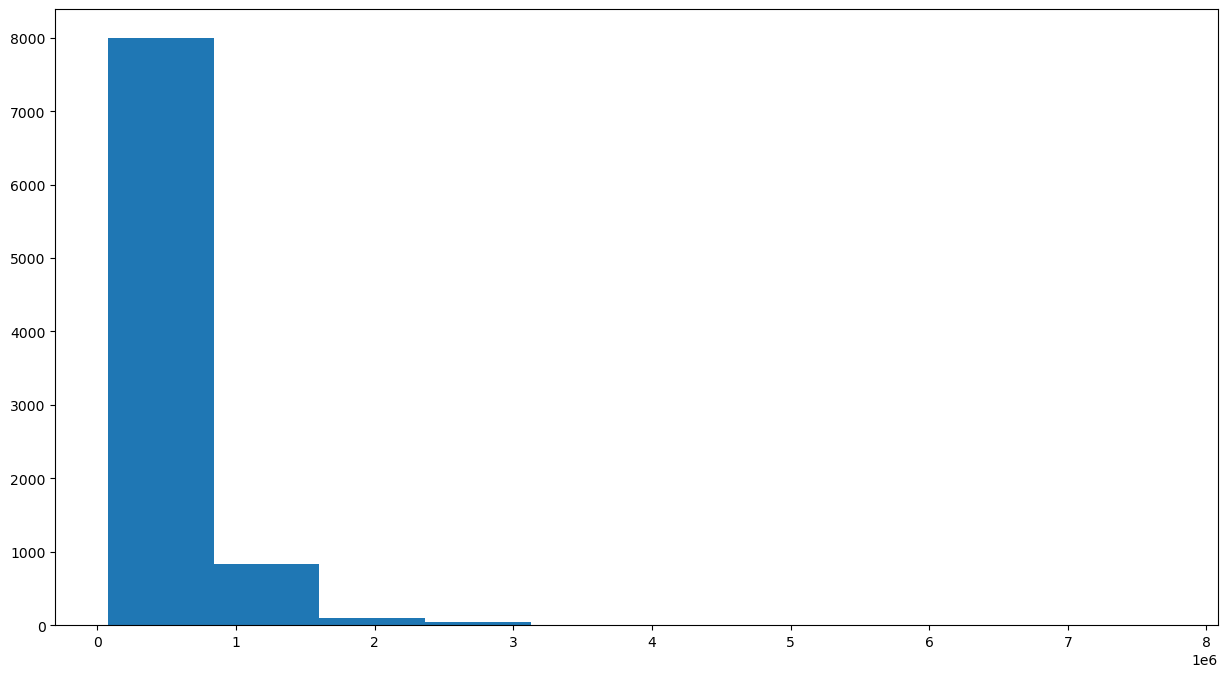

This is : Southeast_of_Seattle


<Figure size 640x480 with 0 Axes>

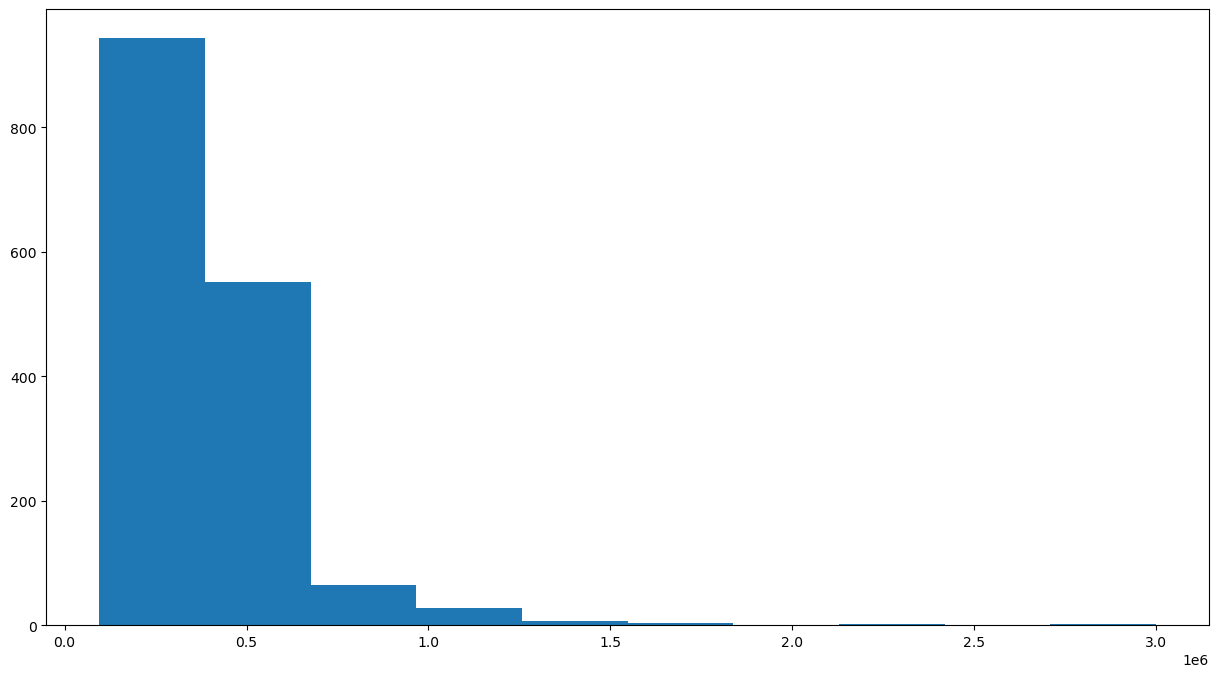

This is : Rich


<Figure size 640x480 with 0 Axes>

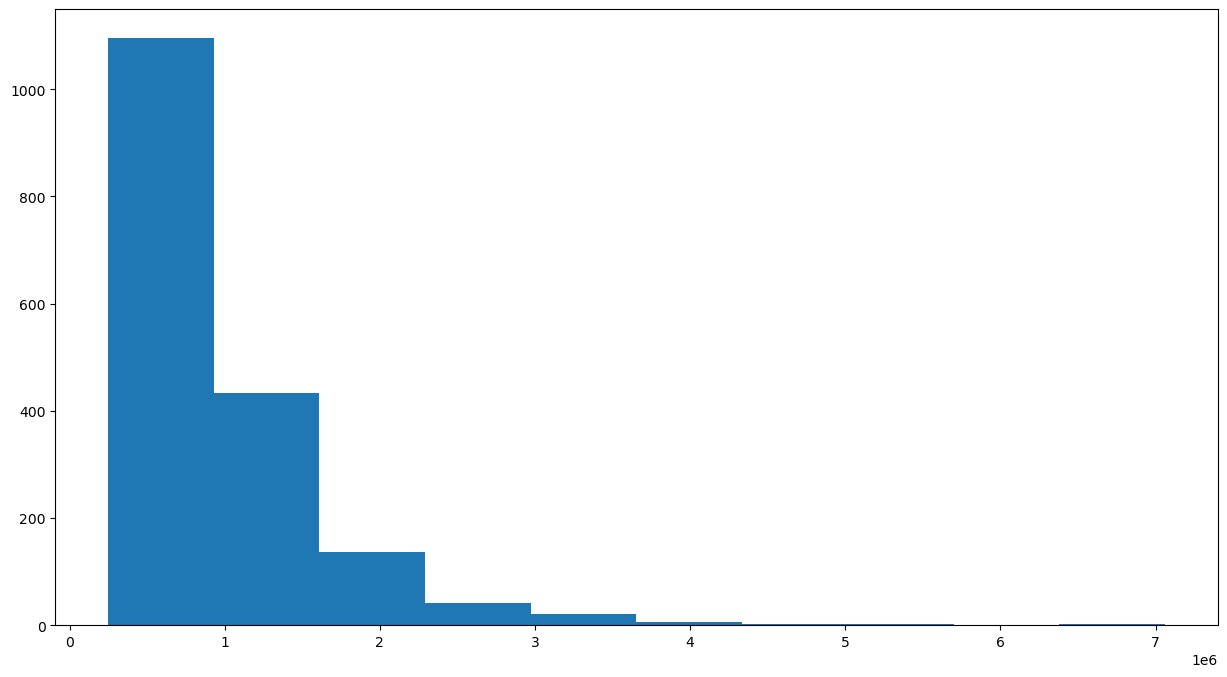

This is : Kirkland


<Figure size 640x480 with 0 Axes>

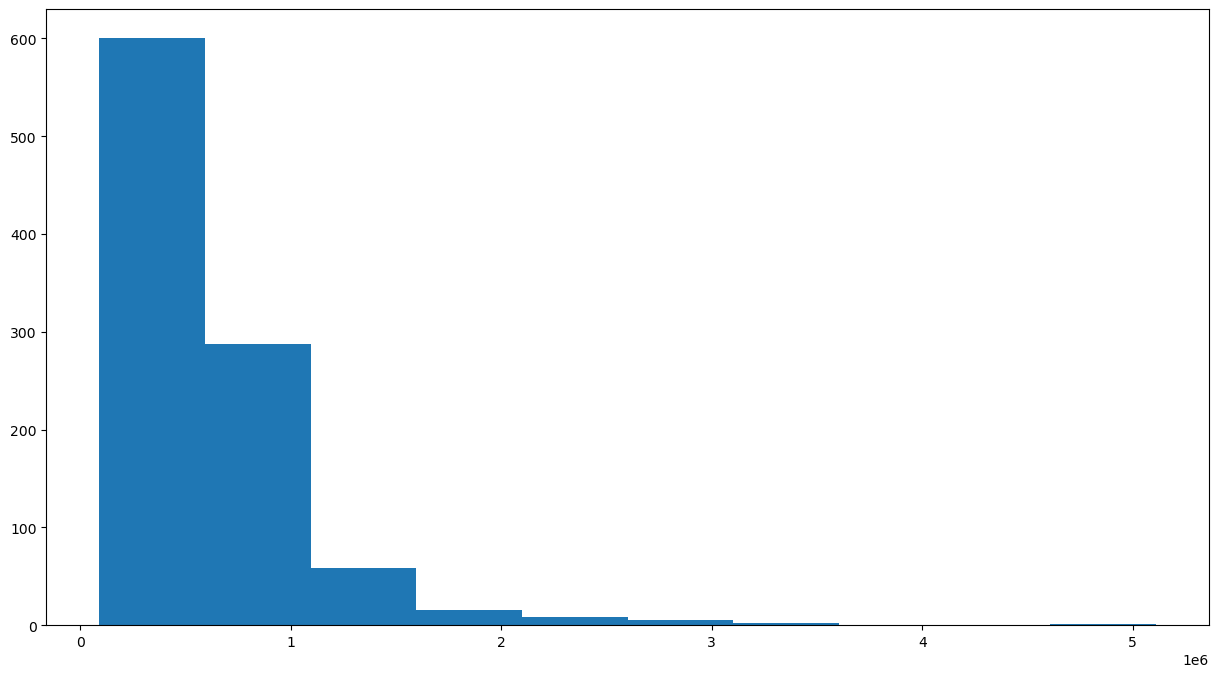

This is : Northeast


<Figure size 640x480 with 0 Axes>

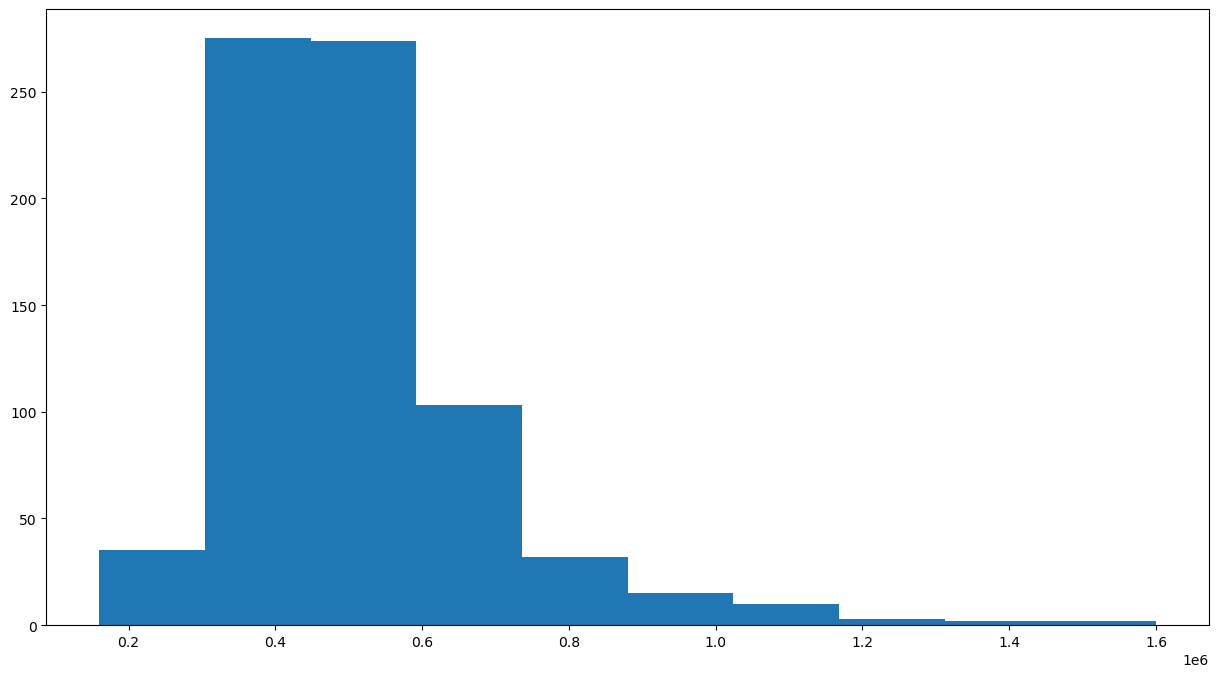

This is : North


<Figure size 640x480 with 0 Axes>

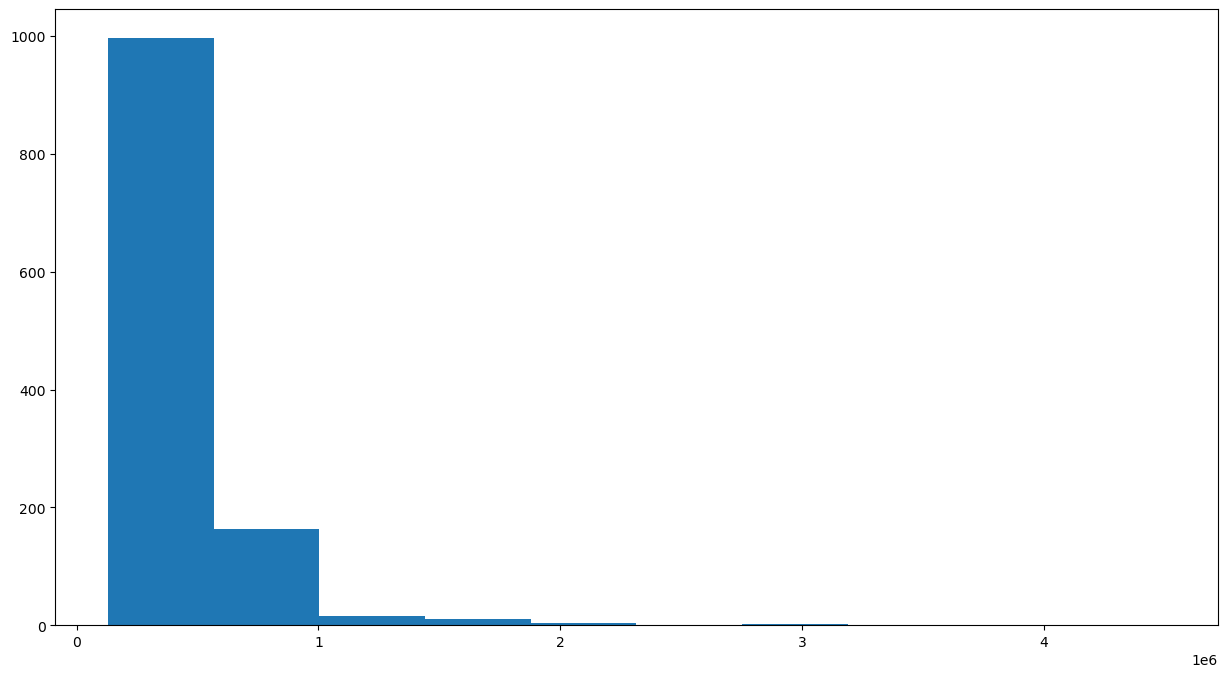

This is : Redmond


<Figure size 640x480 with 0 Axes>

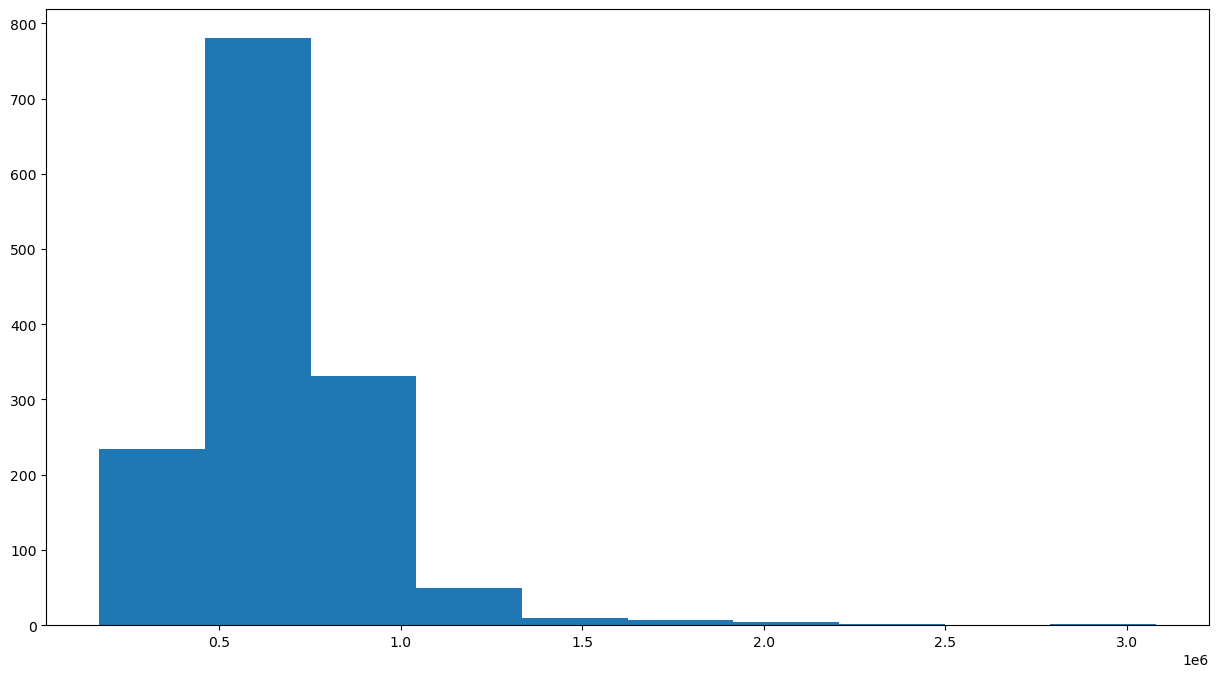

This is : Suburan


<Figure size 640x480 with 0 Axes>

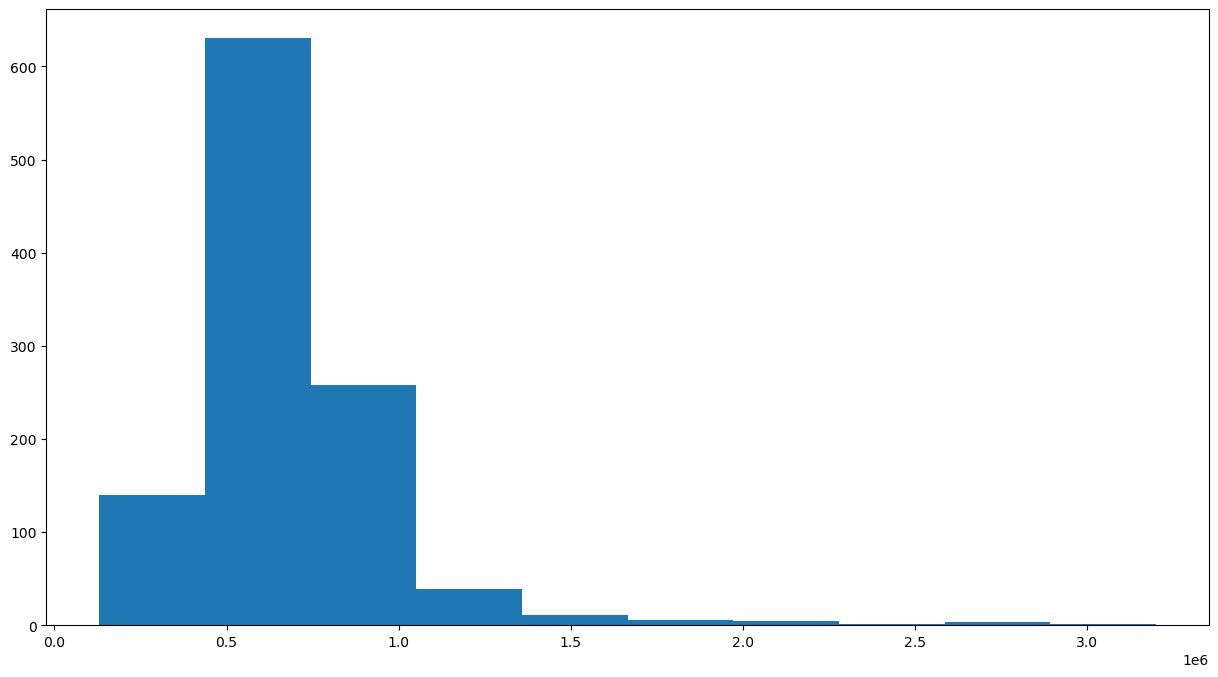

This is : Rural


<Figure size 640x480 with 0 Axes>

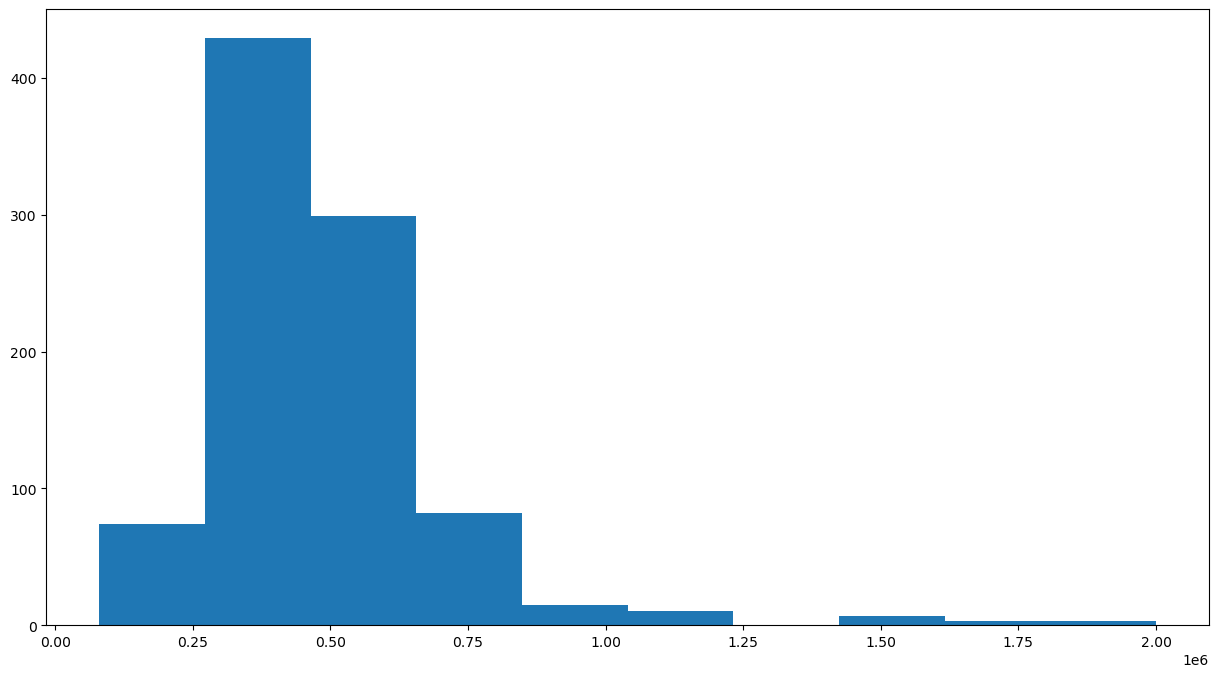

In [160]:
for i in regions_df.keys():
    fig = plt.subplots(figsize=(15,8))
    print('This is : {}'.format(i))
    plt.hist(regions_df[i]['price'])
    plt.show()
    plt.clf()

In [239]:
outliers

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'has_basement',
 'recently_renovated']

## Not cleaned - Model

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

col_selector = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'view', 'waterfront', 
               'has_basement', 'condition', 'floors', 'recently_renovated']

model_dict= {}
error_dict = {}
r_square = {}
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

for i in regions_df.keys():
    
    col_lst = list(regions_df[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:7]
    
    x = regions_df[i][col_lst]
    X = poly.fit_transform(x)
    y = regions_df[i]['price']
    
    
    test = None
    
    if len(regions_df[i]) < 300:
        test = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    else:
        test = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    
    MAE = mean_absolute_error(y_pred, y_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))


    
    model_dict[i] = [lr, rsquared, test]
    error_dict[i] = [MAE, RMSE]
    
    print('{}: {}'.format(i, col_lst))

Southwest: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'floors']
Southeast: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'floors', 'bedrooms']
Island: ['grade', 'sqft_living', 'bathrooms', 'sqft_living15', 'view', 'recently_renovated']
South_of_Seattle: ['sqft_living', 'grade', 'view', 'sqft_living15', 'waterfront', 'bathrooms']
Seattle: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'bedrooms']
Southeast_of_Seattle: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'floors', 'waterfront']
Rich: ['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'view', 'waterfront']
Kirkland: ['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'view', 'waterfront']
Northeast: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'floors', 'bedrooms']
North: ['sqft_living', 'grade', 'view', 'sqft_living15', 'bathrooms', 'waterfront']
Redmond: ['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'waterfront', 'view']
Suburan: ['sqft_living', 'g

In [241]:
for i in model_dict.keys():
    print('{}: {}, {}'.format(i, model_dict[i][1], model_dict[i][2]))

Southwest: 0.7515535122429754, 0.2
Southeast: 0.6996803801588376, 0.2
Island: 0.6924417564583738, 0.3
South_of_Seattle: 0.7593280109991207, 0.2
Seattle: 0.7038191579293565, 0.2
Southeast_of_Seattle: 0.8399977552816191, 0.2
Rich: 0.7709592833877998, 0.2
Kirkland: 0.8321698619325294, 0.2
Northeast: 0.7377447609024529, 0.2
North: 0.8910514900255708, 0.2
Redmond: 0.8431686907428453, 0.2
Suburan: 0.8717453930870914, 0.2
Rural: 0.8472511154463986, 0.2


In [242]:
for i in error_dict.keys():
    print('{}: MAE - {}, RMSE - {}'.format(i, error_dict[i][0], error_dict[i][1]))

Southwest: MAE - 34494.1462985735, RMSE - 50999.851331271835
Southeast: MAE - 43432.83958851597, RMSE - 62713.870117694525
Island: MAE - 122953.22418845618, RMSE - 183114.9141931222
South_of_Seattle: MAE - 68909.83343389972, RMSE - 103897.28515851537
Seattle: MAE - 132589.05925530617, RMSE - 187437.9342796749
Southeast_of_Seattle: MAE - 54869.02995106093, RMSE - 71896.02655286937
Rich: MAE - 199395.58082917967, RMSE - 294521.2063253358
Kirkland: MAE - 115864.0343125969, RMSE - 204806.20172416797
Northeast: MAE - 57622.53167904738, RMSE - 79842.21854468998
North: MAE - 85372.78568701571, RMSE - 163791.71878117294
Redmond: MAE - 92557.99436627461, RMSE - 303474.3903886175
Suburan: MAE - 71062.44106341687, RMSE - 121485.6456696312
Rural: MAE - 71362.15551170858, RMSE - 123010.21229443711


In [243]:
for i in model_dict.keys():
    print('{}: {}'.format(i,model_dict[i][0].n_features_in_))

Southwest: 21
Southeast: 21
Island: 21
South_of_Seattle: 21
Seattle: 21
Southeast_of_Seattle: 21
Rich: 21
Kirkland: 21
Northeast: 21
North: 21
Redmond: 21
Suburan: 21
Rural: 21


## Log Transformation Model

In [244]:
log_dfs = regions_df

for i in log_dfs.keys():
    for x in outliers:
        log_dfs[i][x] = log_dfs[i][x].map(lambda k: np.log(k) if k > 0 else 0)

In [245]:
col_selector = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'view', 'waterfront', 
               'has_basement', 'condition', 'floors', 'recently_renovated']

model_dict2= {}
error_dict2 = {}

poly = PolynomialFeatures(include_bias=False, interaction_only=True)

for i in log_dfs.keys():
    
    col_lst = list(log_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:7]
    
    x = log_dfs[i][col_lst]
    X = poly.fit_transform(x)
    y = log_dfs[i]['price']
    
    
    test = None
    
    if len(log_dfs[i]) < 300:
        test = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    else:
        test = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    
    MAE = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    RMSE = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))


    
    model_dict2[i] = [lr, rsquared, test]
    error_dict2[i] = [MAE, RMSE]
    
    print('{}: {}'.format(i, col_lst))

Southwest: ['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'floors', 'bedrooms']
Southeast: ['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'floors', 'bedrooms']
Island: ['grade', 'sqft_living', 'bathrooms', 'floors', 'view', 'sqft_living15']
South_of_Seattle: ['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'view', 'bedrooms']
Seattle: ['grade', 'sqft_living', 'sqft_living15', 'bathrooms', 'view', 'bedrooms']
Southeast_of_Seattle: ['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'floors', 'bedrooms']
Rich: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'floors', 'view']
Kirkland: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'floors']
Northeast: ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors']
North: ['sqft_living', 'grade', 'sqft_living15', 'view', 'bathrooms', 'bedrooms']
Redmond: ['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'bedrooms', 'floors']
Suburan: ['sqft_living', 'grade', 'sqft_living15'

In [246]:
for i in model_dict2.keys():
    print('{}: {}, {}'.format(i, model_dict2[i][1], model_dict2[i][2]))
    
print("    ")

for i in error_dict2.keys():
    print('{}: MAE - {}, RMSE - {}'.format(i, error_dict2[i][0], error_dict2[i][1]))
    
    
print("      ")

for i in model_dict.keys():
    print('{}: {}'.format(i,model_dict[i][0].n_features_in_))

Southwest: 0.7384587489409913, 0.2
Southeast: 0.701588869867974, 0.2
Island: 0.754253655907247, 0.3
South_of_Seattle: 0.6693277235880818, 0.2
Seattle: 0.5954797275418453, 0.2
Southeast_of_Seattle: 0.7615117273154408, 0.2
Rich: 0.7352163381465875, 0.2
Kirkland: 0.7724749371925315, 0.2
Northeast: 0.7536275306201367, 0.2
North: 0.7695942501914516, 0.2
Redmond: 0.7719392316487178, 0.2
Suburan: 0.8395947429920453, 0.2
Rural: 0.8159539481852003, 0.2
    
Southwest: MAE - 40495.847145466, RMSE - 72269.92996465944
Southeast: MAE - 45304.15185225319, RMSE - 74053.98467078166
Island: MAE - 124960.14172417068, RMSE - 164681.60321359686
South_of_Seattle: MAE - 61734.555377576704, RMSE - 88337.82206779771
Seattle: MAE - 129043.93420132465, RMSE - 192129.31354954102
Southeast_of_Seattle: MAE - 59051.032130564, RMSE - 79776.76611675778
Rich: MAE - 229151.5027506158, RMSE - 377725.88815992145
Kirkland: MAE - 108644.93265139808, RMSE - 164120.14214152528
Northeast: MAE - 59182.96901185926, RMSE - 92068

## Quantile Model

In [247]:
quantile_dfs = regions_df

for i in quantile_dfs.keys():
    for x in outliers:    
        
        data = quantile_dfs[i][x]

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        quantile_dfs[i][x] = np.where(data > upper, upper, data)
        quantile_dfs[i][x] = np.where(data < lower, lower, data)

In [256]:
col_selector = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'view', 'waterfront', 
               'has_basement', 'condition', 'floors', 'recently_renovated']

model_dict3= {}
error_dict3 = {}

poly = PolynomialFeatures(include_bias=False, interaction_only=True)


for i in quantile_dfs.keys():
    
    col_lst = list(quantile_dfs[i].loc[:, col_selector].corr().price.sort_values(ascending=False).index)[1:3]
    
    x = quantile_dfs[i][col_lst]
    X = poly.fit_transform(x)
    y = quantile_dfs[i]['price']
    
    
    test = None
    
    if len(quantile_dfs[i]) < 300:
        test = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    else:
        test = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    
    MAE = mean_absolute_error(y_pred, y_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))


    
    model_dict3[i] = [lr, rsquared, test]
    error_dict3[i] = [MAE, RMSE]
    
    print('{}: {}'.format(i, col_lst))

Southwest: ['sqft_living', 'sqft_living15']
Southeast: ['sqft_living', 'sqft_living15']
Island: ['grade', 'sqft_living']
South_of_Seattle: ['sqft_living', 'grade']
Seattle: ['grade', 'sqft_living']
Southeast_of_Seattle: ['sqft_living', 'grade']
Rich: ['sqft_living', 'grade']
Kirkland: ['sqft_living', 'grade']
Northeast: ['sqft_living', 'grade']
North: ['sqft_living', 'grade']
Redmond: ['sqft_living', 'sqft_living15']
Suburan: ['sqft_living', 'grade']
Rural: ['sqft_living', 'grade']


In [258]:
for i in model_dict3.keys():
    print('{}: {}, {}'.format(i, model_dict3[i][1], model_dict3[i][2]))
    
print("    ")

for i in error_dict3.keys():
    print('{}: MAE - {}, RMSE - {}'.format(i, error_dict3[i][0], error_dict3[i][1]))
    
    
print("      ")

for i in model_dict3.keys():
    print('{}: {}'.format(i,model_dict3[i][0].n_features_in_))

Southwest: 0.7051513426666658, 0.2
Southeast: 0.6552010234086628, 0.2
Island: 0.5489069327304446, 0.3
South_of_Seattle: 0.5641988402016436, 0.2
Seattle: 0.5506131069383609, 0.2
Southeast_of_Seattle: 0.7359845142046446, 0.2
Rich: 0.6792106053196871, 0.2
Kirkland: 0.7149098913438063, 0.2
Northeast: 0.7471248906837692, 0.2
North: 0.6767287402270754, 0.2
Redmond: 0.7598519152766863, 0.2
Suburan: 0.7788564403122904, 0.2
Rural: 0.7842525320757996, 0.2
    
Southwest: MAE - 0.11995387334841917, RMSE - 0.16169230950570165
Southeast: MAE - 0.13520356205199138, RMSE - 0.18360780453794723
Island: MAE - 0.19932816079220972, RMSE - 0.2274472110933817
South_of_Seattle: MAE - 0.19526420219776106, RMSE - 0.26481186029538084
Seattle: MAE - 0.2635861119178161, RMSE - 0.3245854921232908
Southeast_of_Seattle: MAE - 0.15872544233282967, RMSE - 0.20241716285360056
Rich: MAE - 0.2270218158943884, RMSE - 0.28359986705638635
Kirkland: MAE - 0.16011569737799675, RMSE - 0.21486362621774557
Northeast: MAE - 0.112